### 패키지 로드

In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import mplcyberpunk
plt.style.use('cyberpunk')
import warnings
warnings.filterwarnings('ignore')

### 데이터 로드 및 정보 확인

#### 데이터
* 다양한 환자의 건강 지표에 대한 정보가 주어지면 환자의 흡연 상태를 예측하는 것
* train.csv : 흡연이 이진 분류 대상
* test.csv : 양성 흡연 확률을 예측하는 것

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
def gr(data):
    bins = [19, 29, 39, 49, 59, 69, 79, np.inf]
    labels = ['20대', '30대', '40대', '50대', '60대', '70대', '80대이상']
    age_group = pd.cut(data['age'], bins = bins, labels = labels)
    data.insert(2, 'age_group', age_group)

In [5]:
gr(train)

In [6]:
def infor(data): 
    print('columns')
    print('\n')
    print(data.columns)
    print('\n')
    print('---------------------------- \n')
    print('info')
    print('\n')
    print(data.info())
    print('\n')
    print('---------------------------- \n')
    print('shape')
    print('\n')
    print(data.shape)

In [7]:
infor(train)

columns


Index(['id', 'age', 'age_group', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')


---------------------------- 

info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   159256 non-null  int64   
 1   age                  159256 non-null  int64   
 2   age_group            159256 non-null  category
 3   height(cm)           159256 non-null  int64   
 4   weight(kg)           159256 non-null  int64   
 5   waist(cm)            159256 non-null  float64 
 6   eyesight(left)       159256

In [8]:
train

,id,age,age_group,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,50대,165,60,81.0,0.5,0.6,1,1,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,70대,165,65,89.0,0.6,0.7,2,2,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,20대,170,75,81.0,0.4,0.5,1,1,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,30대,180,95,105.0,1.5,1.2,1,1,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,30대,165,60,80.5,1.5,1.0,1,1,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,40대,155,45,69.0,1.5,2.0,1,1,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,50대,155,75,82.0,1.0,1.0,1,1,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,40대,160,50,66.0,1.5,1.0,1,1,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,50대,165,75,92.0,1.2,1.0,1,1,...,55,80,14.4,1,1.1,22,17,37,0,1


#### Train Set 변수 설명 ####
- id : 고객 고유번호 (Primary Key로 활용 가능)
- age : 나이 (20세 ~ 80세로 구성됨)
- age_group : 연령대
- height(cm) : 키
- weight(kg) : 몸무게
- waist(cm) : 허리둘레
- eyesight(left) : 좌안 시력
- eyesight(right) : 우안 시력
- hearing(left) : 좌이 청력
- hearing(right) : 우이 청력
- systolic : 수축기압 (혈액의 동맥벽에 미치는 압력으로 왼심실에서 박출이 끝나기 전에 생기는 압을 말함.)
- relaxation : 스트레스 점수 (몸과 마음의 긴장이나 스트레스를 감소시키고 평온한 상태로 돌아가는 과정)
- fasting blood sugar : 공복혈당 (음식 섭취 전에 측정된 혈액 중의 포도당의 농도)
- Cholesterol : 콜레스테롤 (LDL + HDL로 동맥경화 위험도 평가 및 고콜레스테롤혈증 선별에 이용)
- triglyceride : 중성지방 (과잉섭취된 에너지를 저장하기 위해 생성된 성분으로 지방으로 저장되었다가 에너지원으로 사용)
- HDL : 고밀도지단백 콜레스테롤
      (좋은 콜레스테롤로 불리며, 남은 콜레스테롤을 제거하거나 간으로 이동시킴.)
      (HDL 농도와 관상동맥 위험도에서 역의 상관관계를 관찰해 관상동맥심질환의 위험도 평가에 사용)
- LDL : 저밀도지단백 콜레스테롤
      (나쁜 콜레스테롤로 불리며, 콜레스테롤을 우리 몸에 필요한 곳에 운반시킴.)
      (혈관벽에 침착시켜 죽상동맥경화를 유발하고 특히 관상동맥경화증의 원인임.)
- hemoglobin : 적혈구의 구성요소로 헤모글로빈이 산소를 붙잡아 혈액의 산소를 잘 운반하는지 확인할 때 사용되는 수치
- Urine protein
      (소변 검사를 통해 단백질을 측정하는 것이며 단백질 농도에 따라 신장 및 당뇨, 고혈압 문제를 확인할 수 있는 수치)
- serum creatinine : 혈청 크레아티닌 수치
      (건강한 신장을 소변을 통해 크레아티닌을 혈액에서 걸러냄.)
      (근육에서 나오는 혈액 속의 노폐물의 양을 측정하는 하는 것으로 신장에 이상이 있으면 혈청 크레아타닌 수치가 증가함.)
- AST : 아스파테이트아미노전이효소
      (간과 심장의 손상 여부를 알아보는 대표적인 검사 수치)
      (간질환, 간염, 간경화, 간암 등을 측정할 수 있음.)
- ALT : 아랄닌아미노전달효소
      (AST보다 간세포 손상을 감지할 수 있는 지표로 간 손상 발견을 위한 유용한 검사)
      (간으로 가는 혈류의 감소나 간 독성을 가지는 약물에 노출될 경우 급증할 수 있음)
      (심장, 골근격계, 신장, 뇌 등에도 본포하고 있음.)
- GTP : 감마-GTP
      (간의 해독 작용에 관계하는 효소로 감마글루타민 전이효소라고 부름)
      (간이나 담관(쓸개)에 분포하지만 췌장, 신장, 대장 뇌등에도 존재)
      (알코올에 민감하게 반응하고 간이나 담도에 질환이 있으면 빠르게 이상치를 보임.)
- dental caries : 치아 우식(충치) 여부 (1: True(우식 있음.)
      (치아 표면의 칼슘과 인 같은 무기질이 빠져나가고 그 속의 단백질과 같은 유기질이 융해되어 치아의 파괴현상을 일으킴.)
- smoking : 흡연 여부 (0: 비흡연, 1: 흡연)

In [9]:
gr(test)

In [10]:
infor(test)

columns


Index(['id', 'age', 'age_group', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries'],
      dtype='object')


---------------------------- 

info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   106171 non-null  int64   
 1   age                  106171 non-null  int64   
 2   age_group            106171 non-null  category
 3   height(cm)           106171 non-null  int64   
 4   weight(kg)           106171 non-null  int64   
 5   waist(cm)            106171 non-null  float64 
 6   eyesight(left)       106171 non-null  

In [11]:
test.columns

Index(['id', 'age', 'age_group', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries'],
      dtype='object')

#### 파생 변수 ####

- BMI : weight/(height/100)^2

- 양안 평균 시력 : {(우안시력)+(좌안시력)}/2반적인 시력 상
 : 우안시력/좌안시력
1에 가까울수록 양안 시

- 대사 건강 지표 : 혈당 및 콜레스테롤 지표의 총합

대사 건강 지표 = 공복혈당 + 총콜레스테롤 + HDL

- 심혈관 건강 지표 : 수축기압, 총 콜레스테롤, HDL 등을 종합하여 심혈관 건강을 나타냄

심혈관 건강 지표 = 수축기압 + 총 콜레스테롤 + HDL

- 간 건강 지표 : AST, GTP 등을 종합하여 간(아스파테이트아미노전이효소+감마-GTP)강을-  나타내는 파생변수 크레아티닌 및 중성지방의 종합 신장 건강을 나타내는 파생 변수(생성

신장 건강 지표 = 혈청 )

- 허리-신장 비율 (WtHR) : 
허리둘레를 키로 나눈 값으로, 비만과 관련된 심혈관 질환 위험을 평가하는 데 사용됩니(.
WtHR = 허리둘레 )

- 스트레스와 혈압의 상호작용 지표 : 스트레스-혈압 상호작용 지표=스트레스 점수×수축기압/ 키크레아티닌 수치 + 중성지방러한 파생변수들은 양안 시력 정보를 보다 다양한 측면에서 이해하고 활용할 수 있도록 도와줍니다.

In [12]:
train['smoking'].unique()

array([1, 0], dtype=int64)

#### Train Set 변수 설명 ####
- id : 고객 고유번호 (Primary Key로 활용 가능)
- age : 나이 (20세 ~ 80세로 구성됨)
- age_group : 연령대
- height(cm) : 키
- weight(kg) : 몸무게
- waist(cm) : 허리둘레
- eyesight(left) : 좌안 시력
- eyesight(right) : 우안 시력
- hearing(left) : 좌이 청력
- hearing(right) : 우이 청력
- systolic : 수축기압 (혈액의 동맥벽에 미치는 압력으로 왼심실에서 박출이 끝나기 전에 생기는 압을 말함.)
- relaxation : 스트레스 점수 (몸과 마음의 긴장이나 스트레스를 감소시키고 평온한 상태로 돌아가는 과정)
- fasting blood sugar : 공복혈당 (음식 섭취 전에 측정된 혈액 중의 포도당의 농도)
- Cholesterol : 콜레스테롤 (LDL + HDL로 동맥경화 위험도 평가 및 고콜레스테롤혈증 선별에 이용)

- triglyceride : 중성지방 (과잉섭취된 에너지를 저장하기 위해 생성된 성분으로 지방으로 저장되었다가 에너지원으로 사용)
  
- HDL : 고밀도지단백 콜레스테롤
- 
      (좋은 콜레스테롤로 불리며, 남은 콜레스테롤을 제거하거나 간으로 이동시킴.)
      (HDL 농도와 관상동맥 위험도에서 역의 상관관계를 관찰해 관상동맥심질환의 위험도 평가에 사용)
- LDL : 저밀도지단백 콜레스테롤
- 
      (나쁜 콜레스테롤로 불리며, 콜레스테롤을 우리 몸에 필요한 곳에 운반시킴.)
      (혈관벽에 침착시켜 죽상동맥경화를 유발하고 특히 관상동맥경화증의 원인임.)
- hemoglobin : 적혈구의 구성요소로 헤모글로빈이 산소를 붙잡아 혈액의 산소를 잘 운반하는지 확인할 때 사용되는 수치
- Urine protein
      (소변 검사를 통해 단백질을 측정하는 것이며 단백질 농도에 따라 신장 및 당뇨, 고혈압 문제를 확인할 수 있는 수치)
  
- serum creatinine : 혈청 크레아티닌 수치
      (건강한 신장을 소변을 통해 크레아티닌을 혈액에서 걸러냄.)
      (근육에서 나오는 혈액 속의 노폐물의 양을 측정하는 하는 것으로 신장에 이상이 있으면 혈청 크레아타닌 수치가 증가함.)
  
- AST : 아스파테이트아미노전이효소
      (간과 심장의 손상 여부를 알아보는 대표적인 검사 수치)
      (간질환, 간염, 간경화, 간암 등을 측정할 수 있음.)
  
- ALT : 아랄닌아미노전달효소
      (AST보다 간세포 손상을 감지할 수 있는 지표로 간 손상 발견을 위한 유용한 검사)
      (간으로 가는 혈류의 감소나 간 독성을 가지는 약물에 노출될 경우 급증할 수 있음)
      (심장, 골근격계, 신장, 뇌 등에도 본포하고 있음.)
  
- GTP : 감마-GTP
      (간의 해독 작용에 관계하는 효소로 감마글루타민 전이효소라고 부름)
      (간이나 담관(쓸개)에 분포하지만 췌장, 신장, 대장 뇌등에도 존재)
      (알코올에 민감하게 반응하고 간이나 담도에 질환이 있으면 빠르게 이상치를 보임.)
  
- dental caries : 치아 우식(충치) 여부 (1: True(우식 있음.)
      (치아 표면의 칼슘과 인 같은 무기질이 빠져나가고 그 속의 단백질과 같은 유기질이 융해되어 치아의 파괴현상을 일으킴.)

In [13]:
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


### 데이터 시각화

#### 결측치

<Axes: >

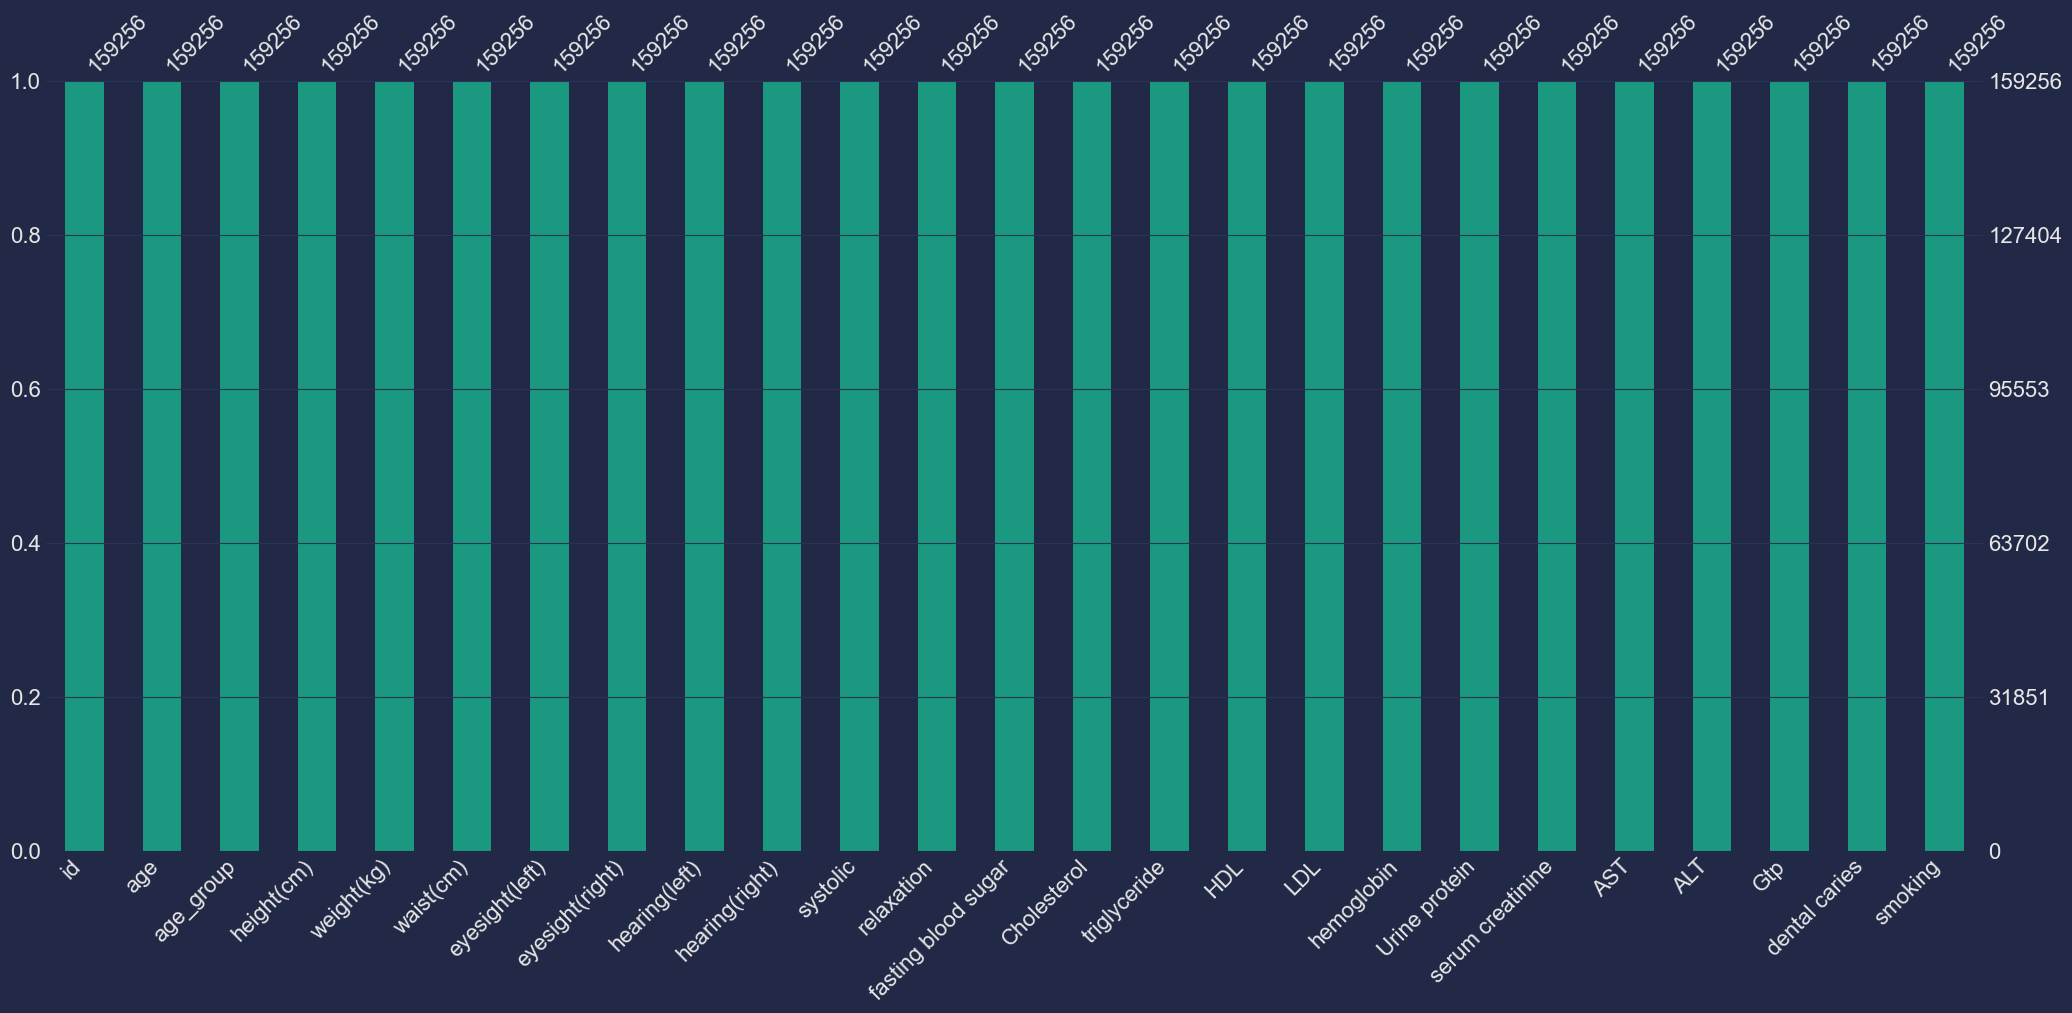

In [18]:
msno.bar(train, color = (0.1, 0.6, 0.5))

#### 데이터 분포 파악

Total No. Of Non Smokers :  56.26%
Total No. Of Smokers :  43.74%


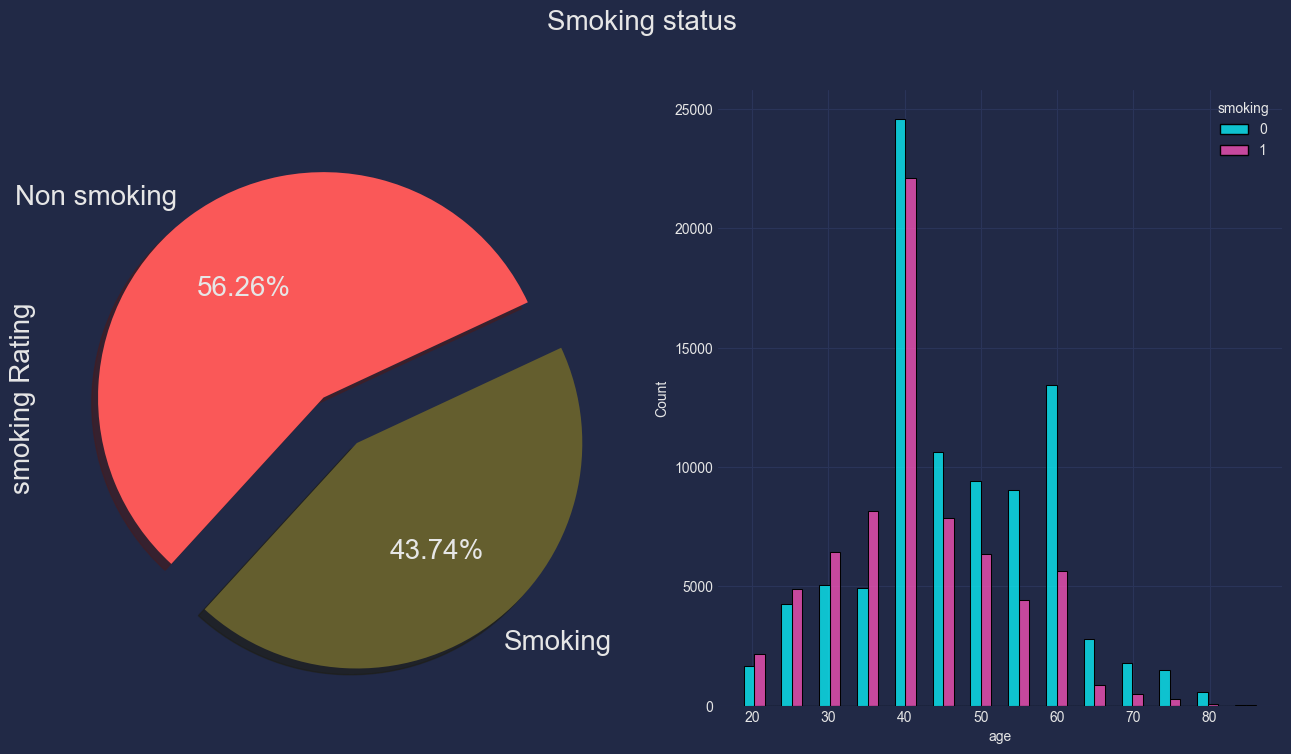

In [19]:
len_non_smoker = len(train["smoking"][train.smoking == 0])
len_smoker = len(train["smoking"][train.smoking == 1])

print("Total No. Of Non Smokers : ", str(round((len_non_smoker/(len_non_smoker+len_smoker))*100, 2)) + '%')
print("Total No. Of Smokers : ", str(round((len_smoker/(len_non_smoker+len_smoker))*100, 2)) + '%')
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#FA5858", "#645E2E"]
labels = "Non smoking", "Smoking"

plt.suptitle('Smoking status', fontsize=20)

train["smoking"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=20, startangle=25)

ax[0].set_ylabel('smoking Rating', fontsize=20)

sns.histplot(x=train.age, hue=train.smoking, multiple='dodge', shrink=5, ax = ax[1])
ax[1].set_ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Height Distribution by Smoking')

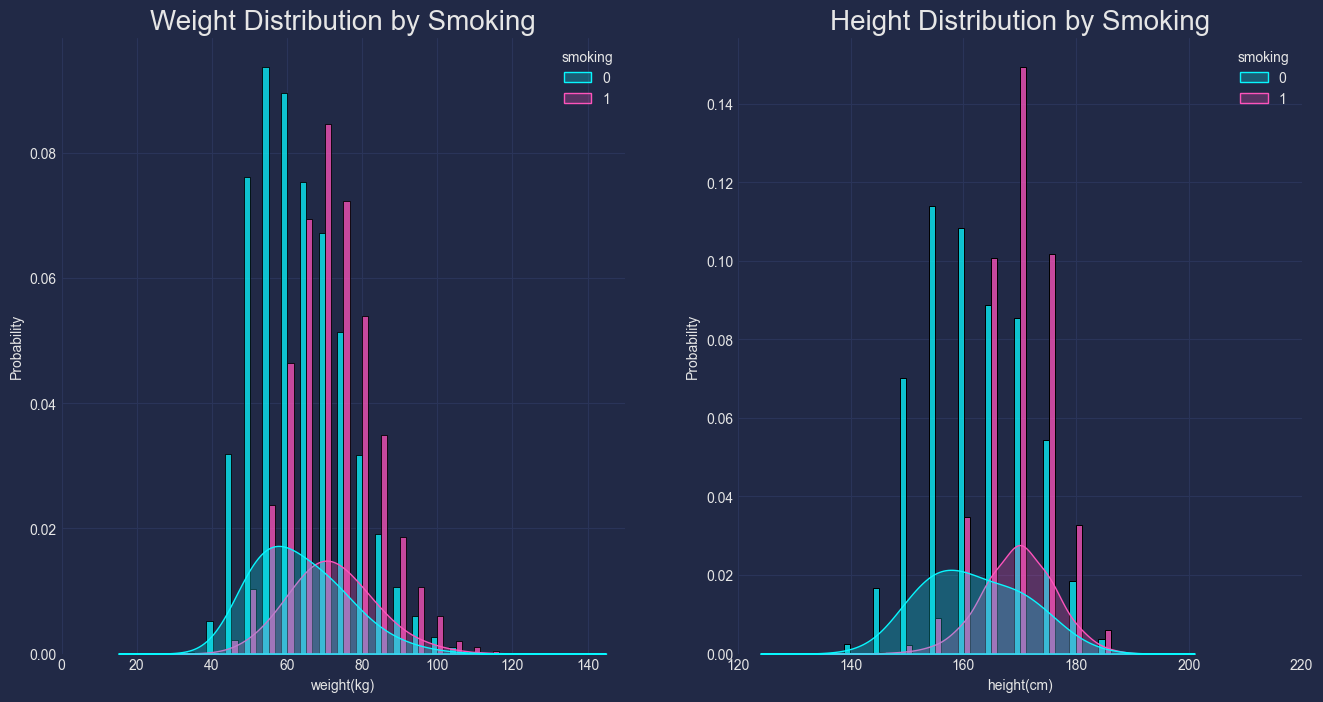

In [20]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.histplot(x=train['weight(kg)'], hue=train.smoking, stat='probability', multiple='dodge', shrink=6)
sns.kdeplot(x=train['weight(kg)'], hue=train.smoking, bw_adjust=4, fill=True)
plt.xlim((0, 150))
plt.title("Weight Distribution by Smoking", size = 20)
plt.subplot(122)
sns.histplot(x=train['height(cm)'], hue=train.smoking, stat='probability', multiple='dodge', shrink=6)
sns.kdeplot(x=train['height(cm)'], hue=train.smoking, bw_adjust=4, fill=True)
plt.xlim((120, 220))
plt.title("Height Distribution by Smoking", size = 20)

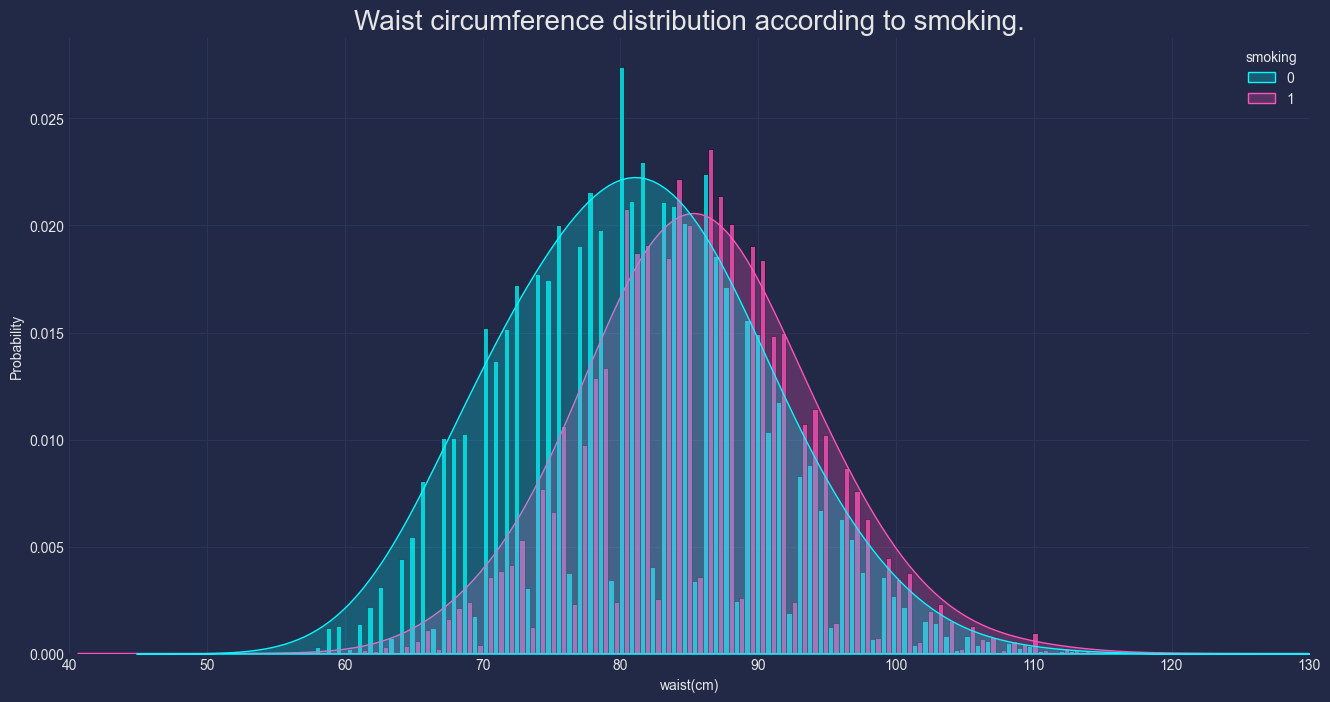

In [21]:
# 허리둘레 분포
plt.figure(figsize=(16,8))

sns.histplot(x=train['waist(cm)'], hue=train.smoking, stat='probability', multiple='dodge', bins=100)
sns.kdeplot(x=train['waist(cm)'], hue=train.smoking, bw_adjust=4, fill=True)
plt.title("Waist circumference distribution according to smoking.", size = 20)
plt.xlim((40, 130))
plt.show()

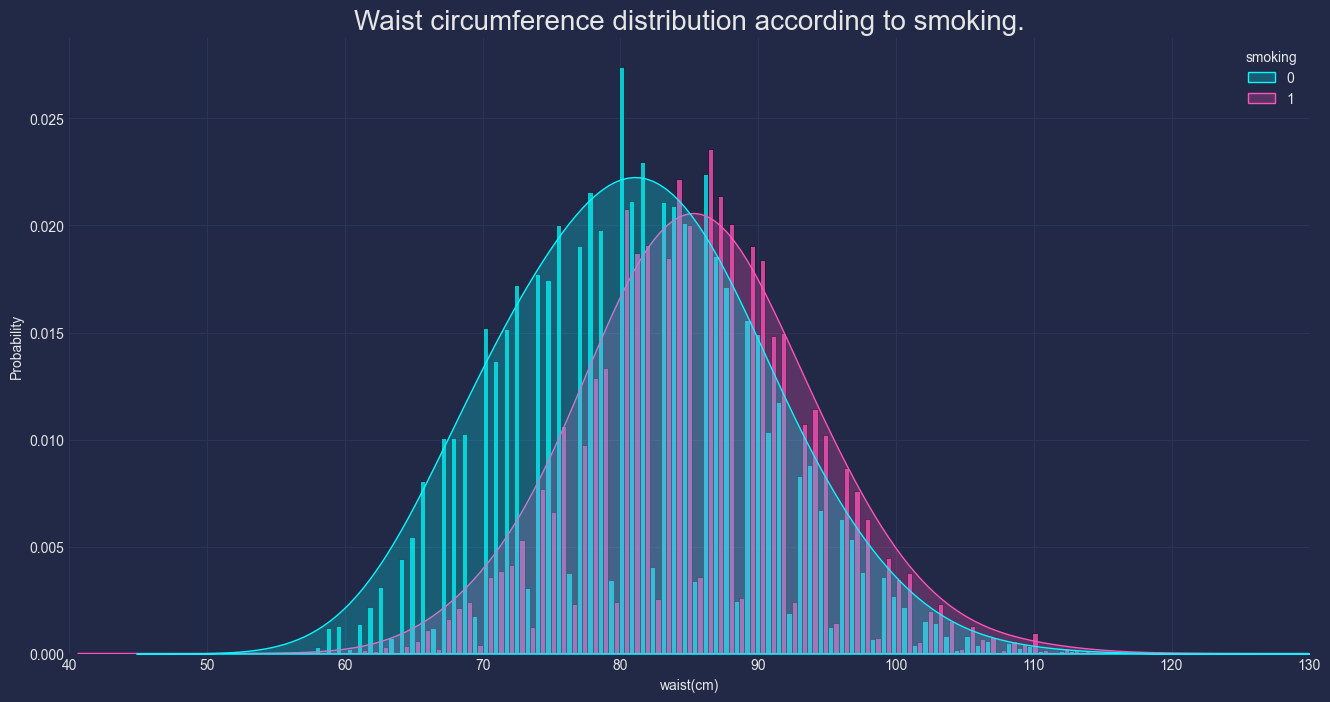

In [22]:
plt.figure(figsize=(16,8))

sns.histplot(x=train['waist(cm)'], hue=train.smoking, stat='probability', multiple='dodge', bins=100)
sns.kdeplot(x=train['waist(cm)'], hue=train.smoking, bw_adjust=4, fill=True)
plt.title("Waist circumference distribution according to smoking.", size = 20)
plt.xlim((40, 130))
plt.show()

In [23]:
def show_hist_by_target(train, columns):
    cond_1 = (train['smoking'] == 1)
    cond_0 = (train['smoking'] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
        sns.violinplot(x='smoking', y=column, data=train, ax=axs[0][0] )
        sns.distplot(train[cond_0][column], ax=axs[0][1], label='0', color='blue')
        sns.distplot(train[cond_1][column], ax=axs[0][1], label='1', color='red')

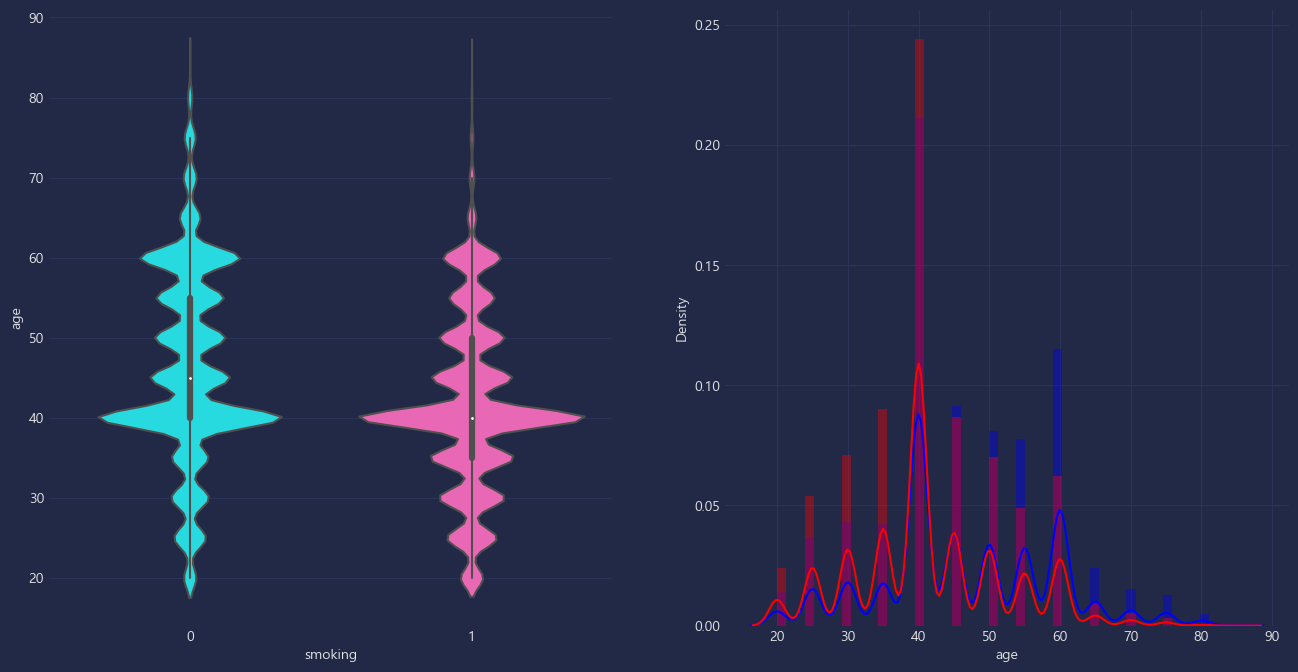

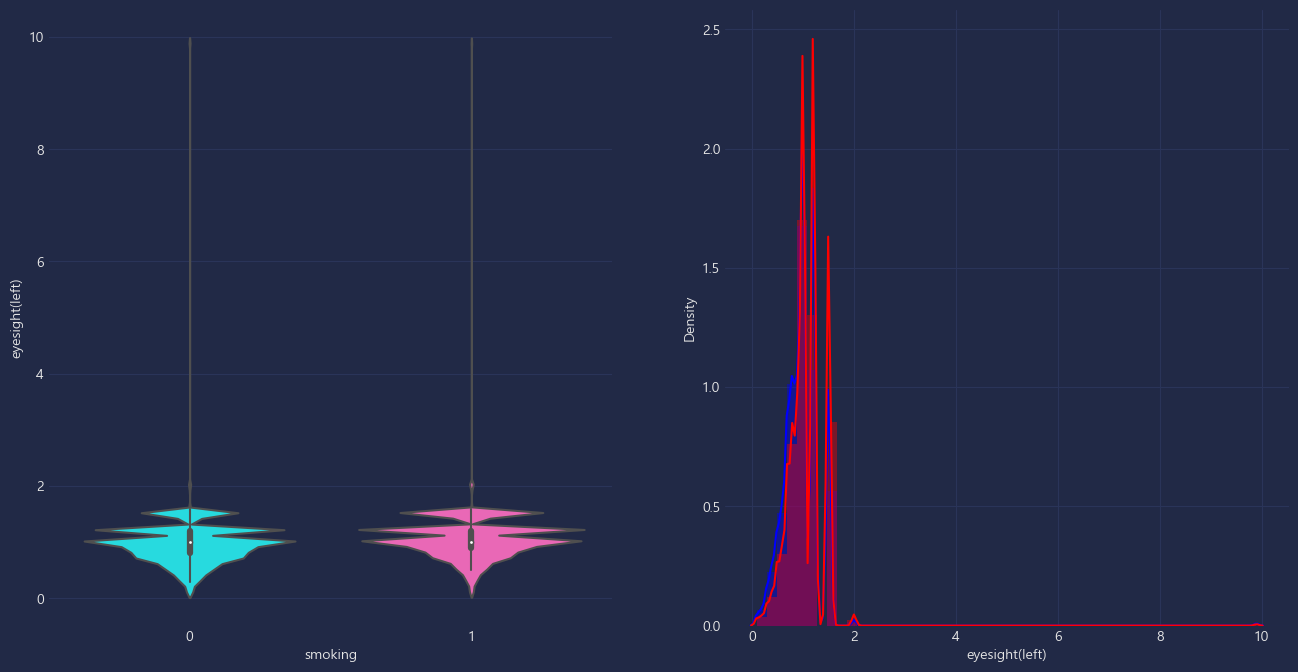

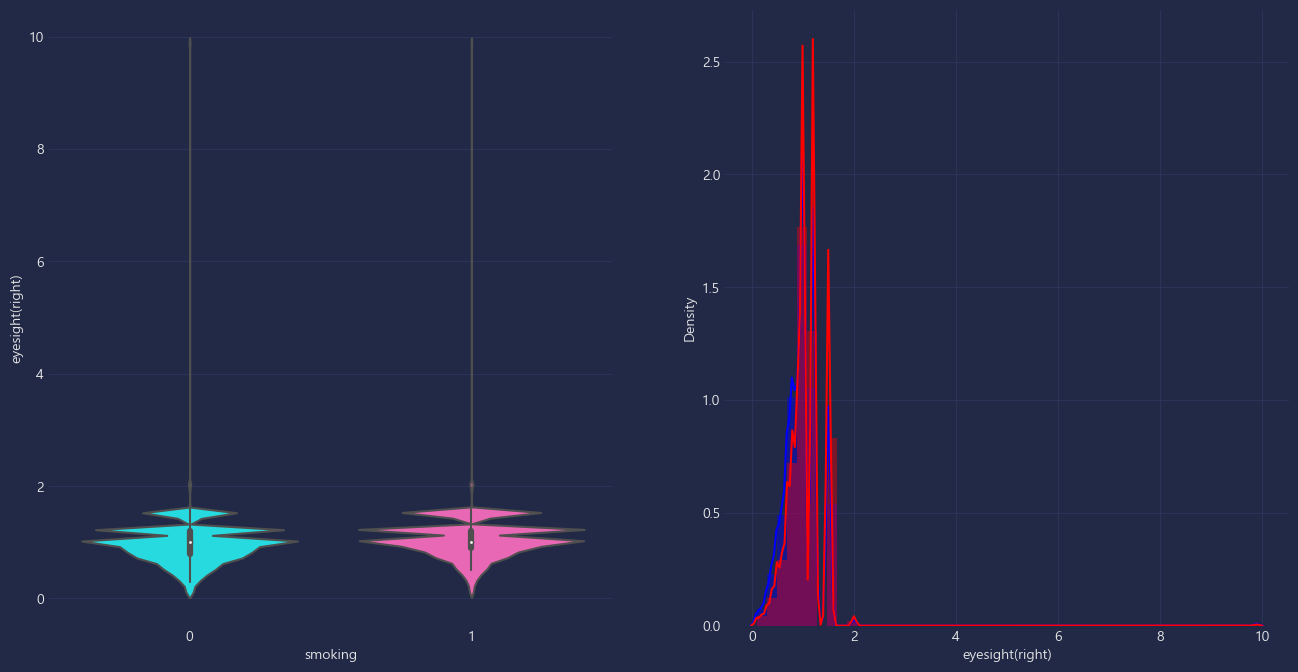

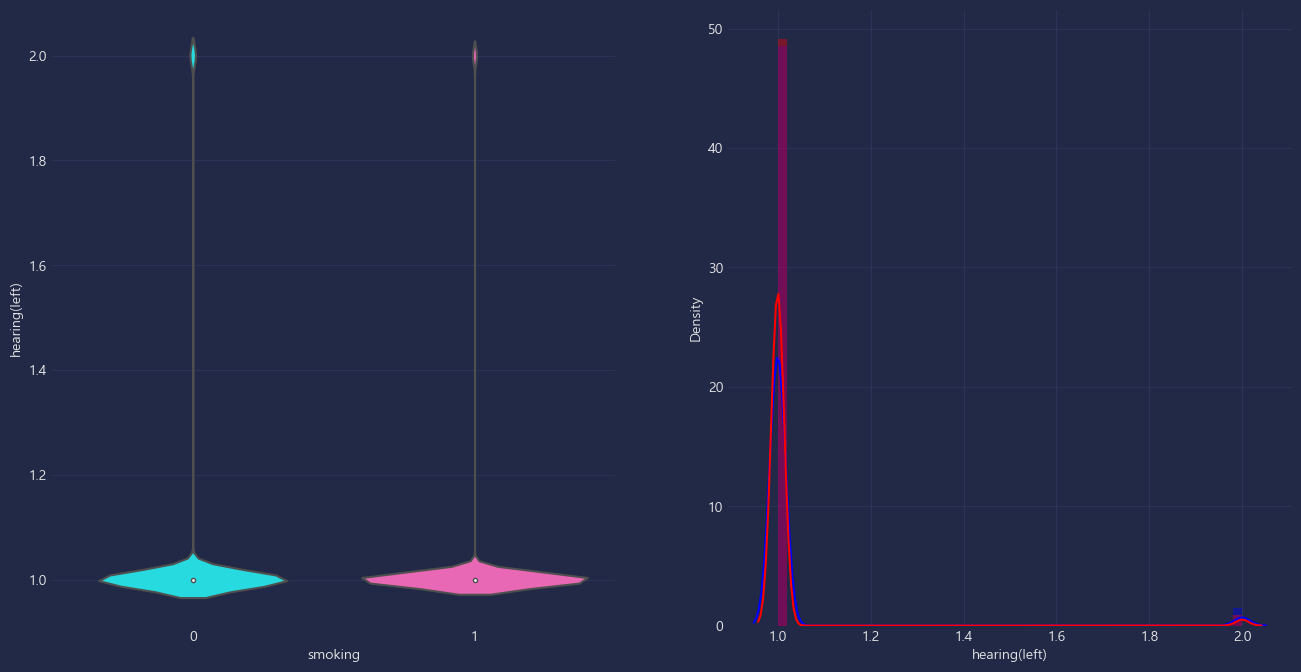

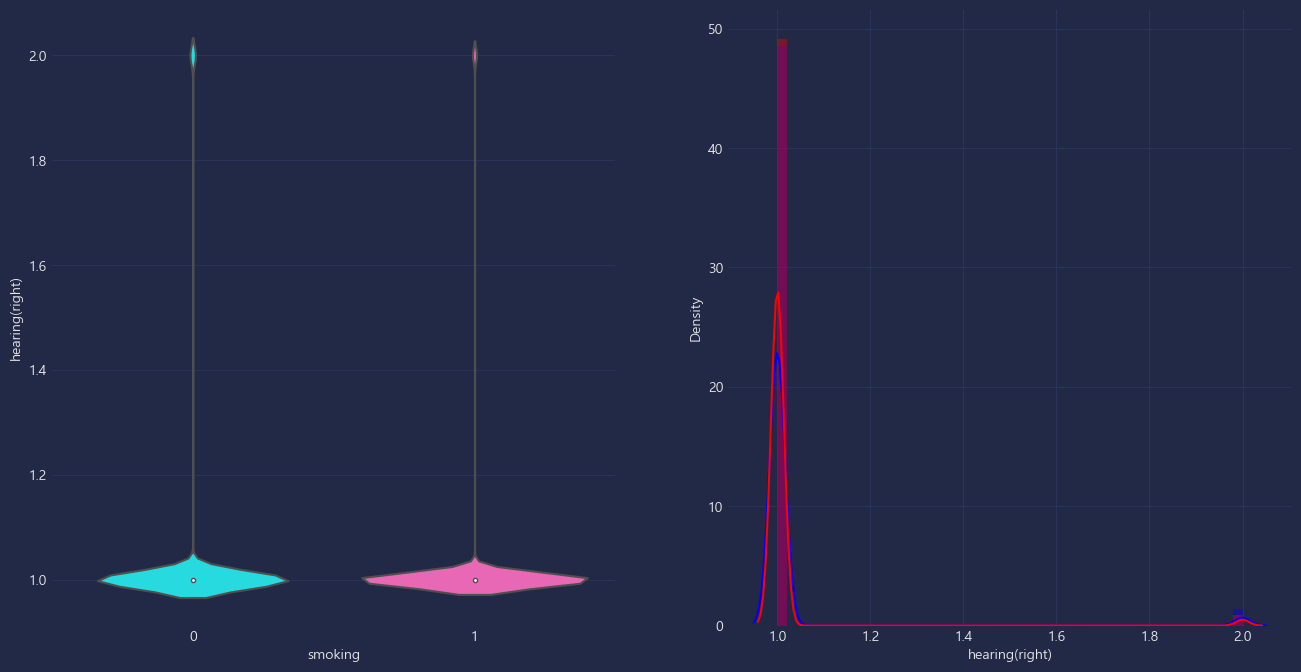

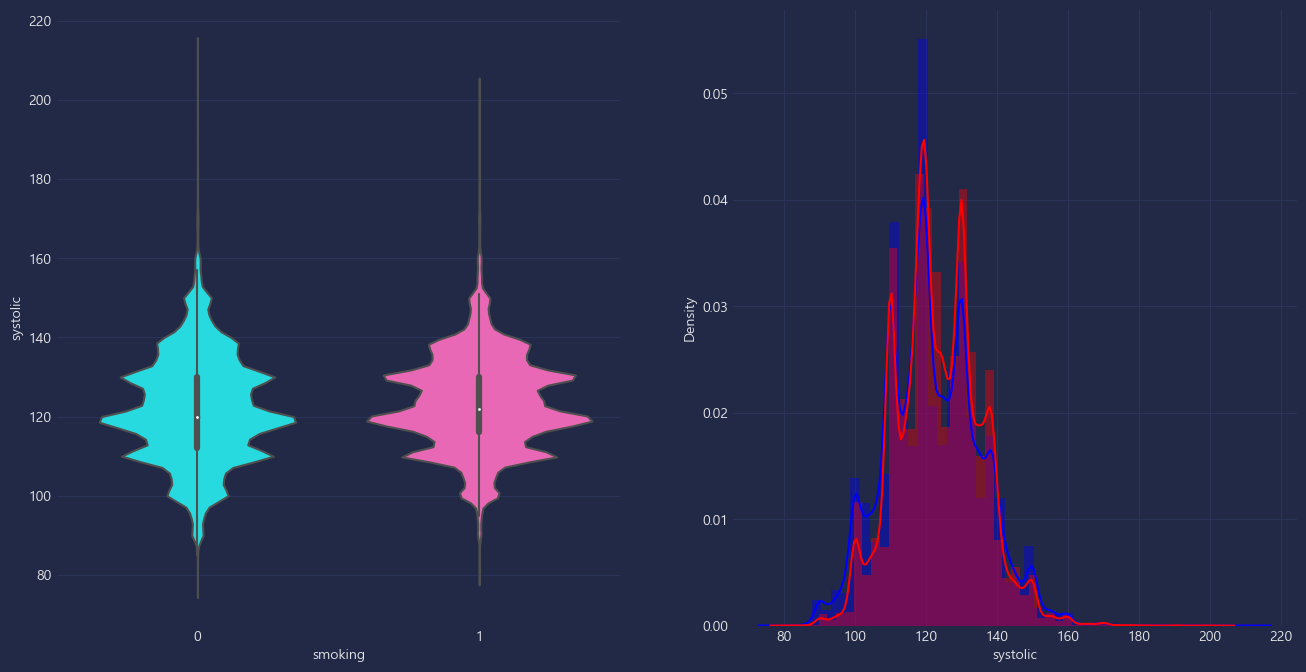

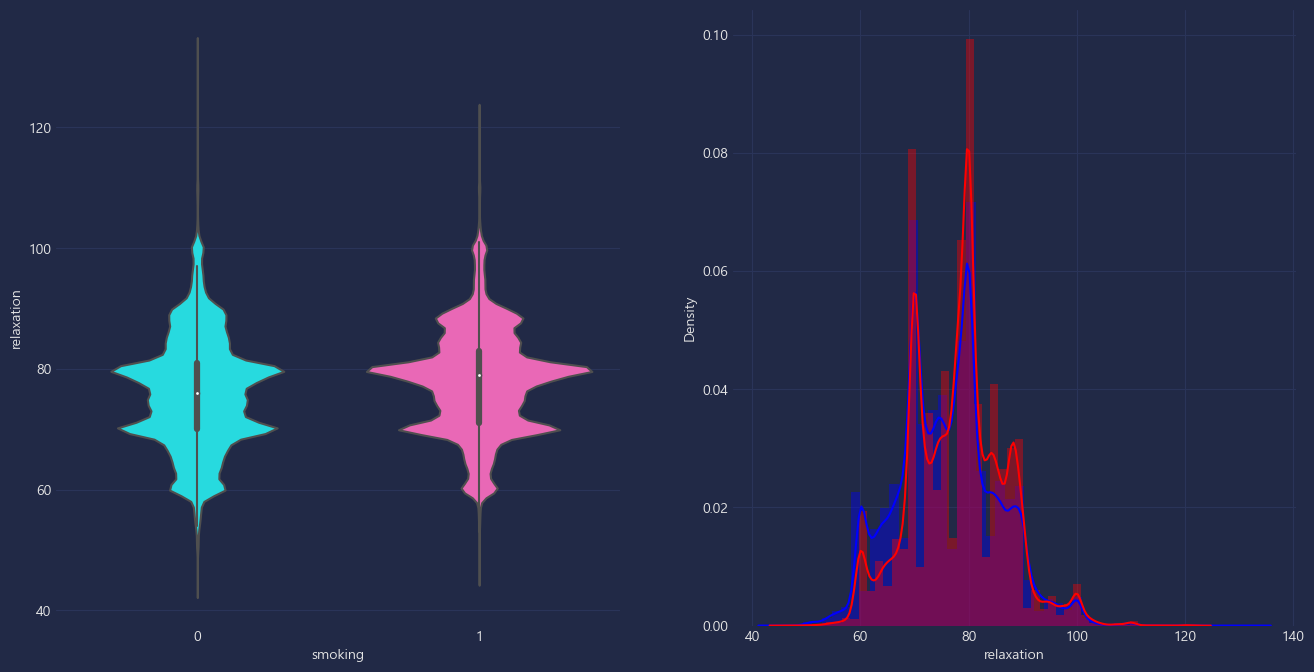

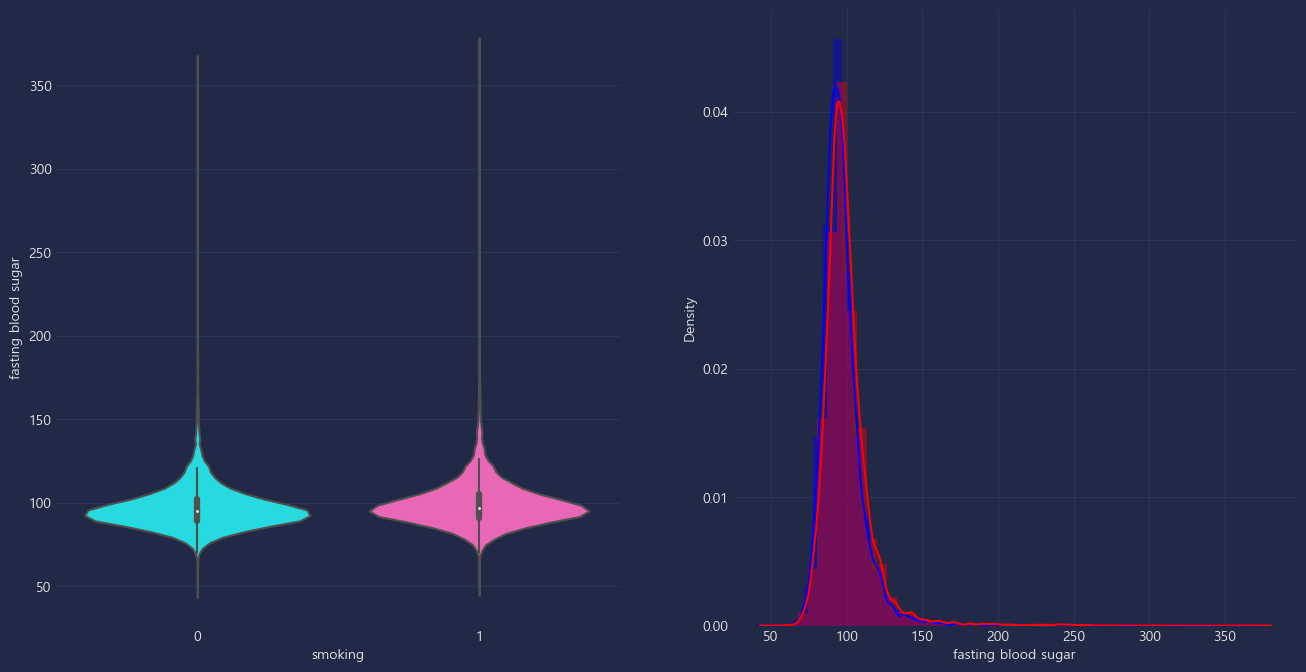

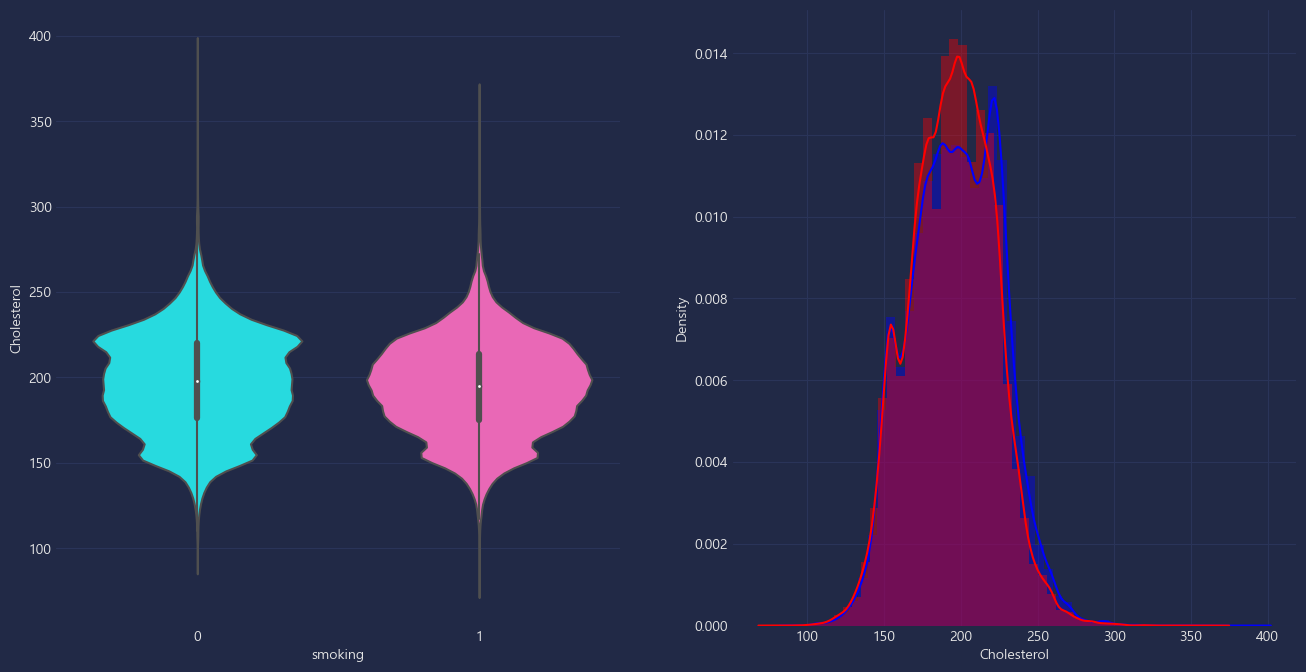

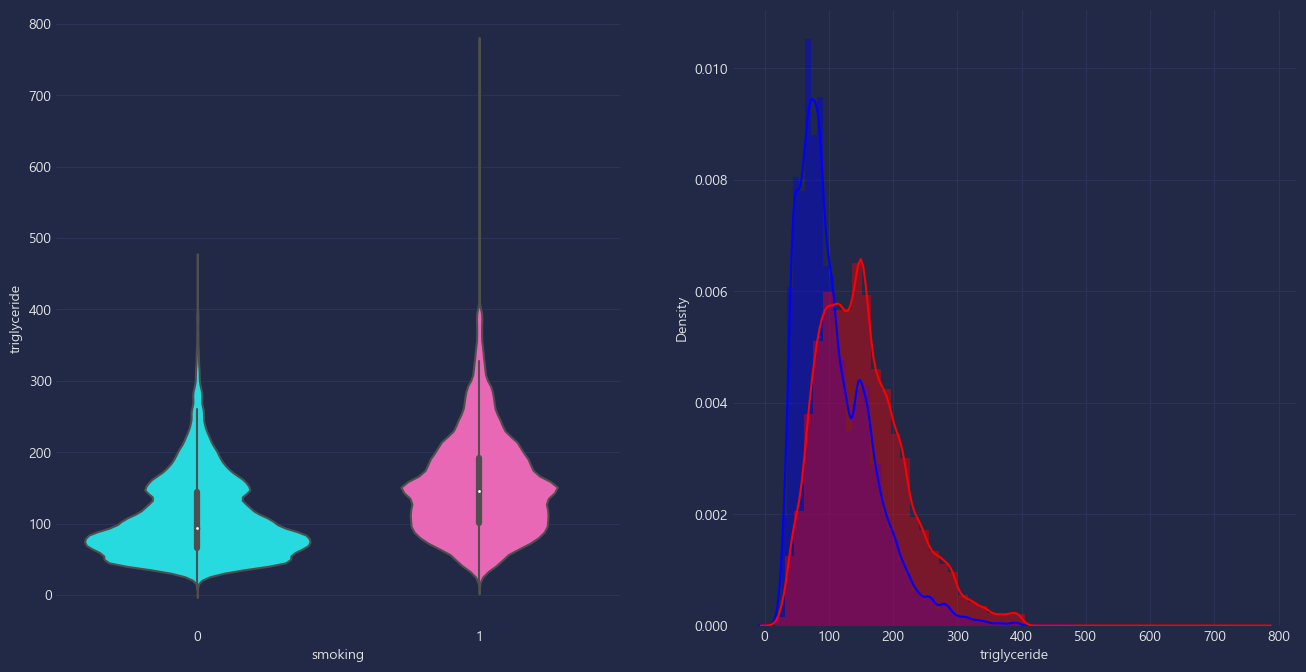

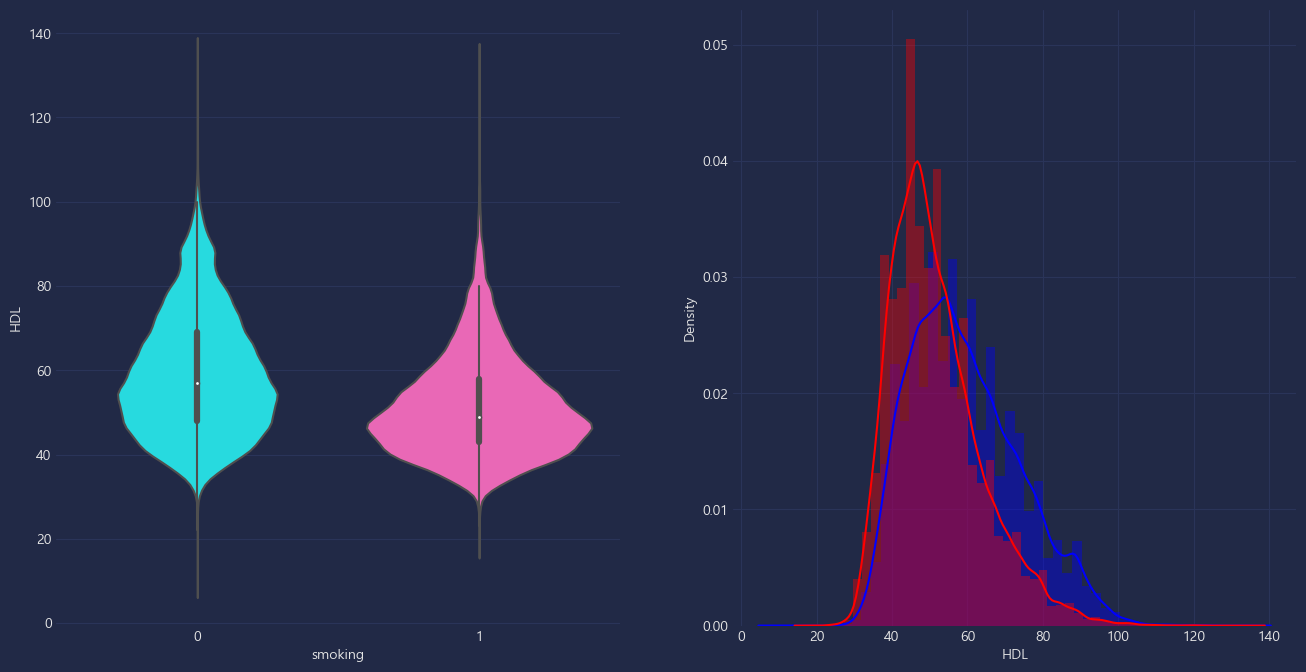

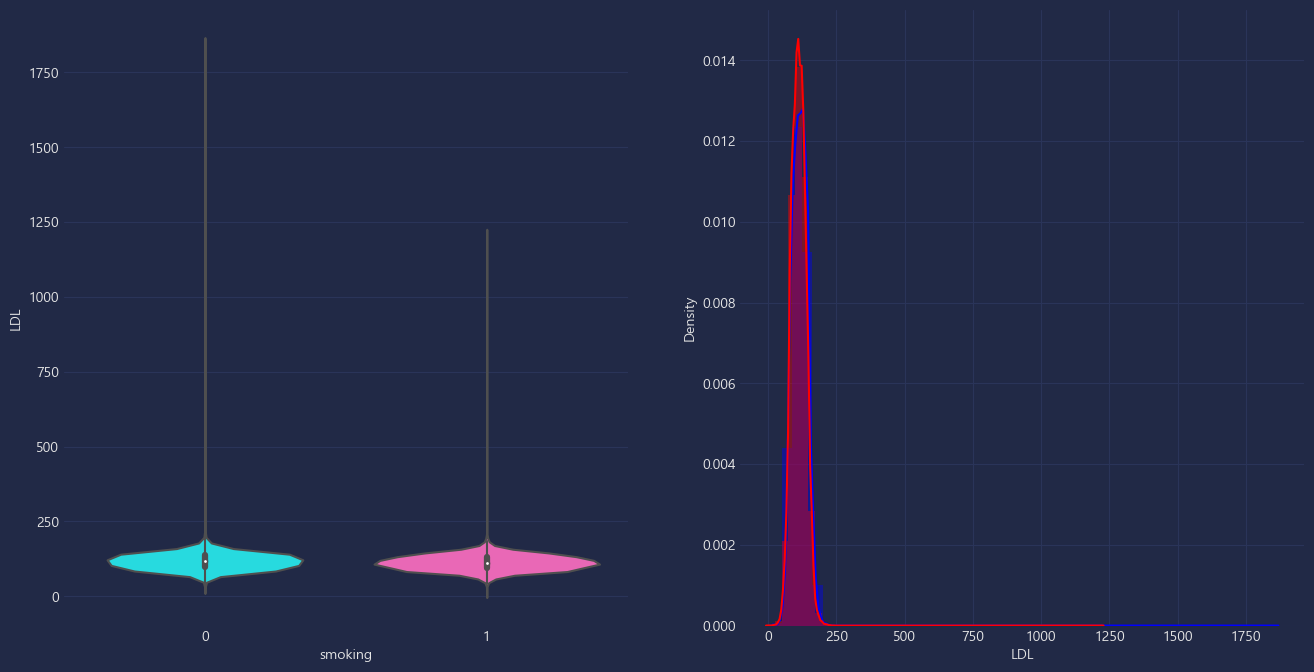

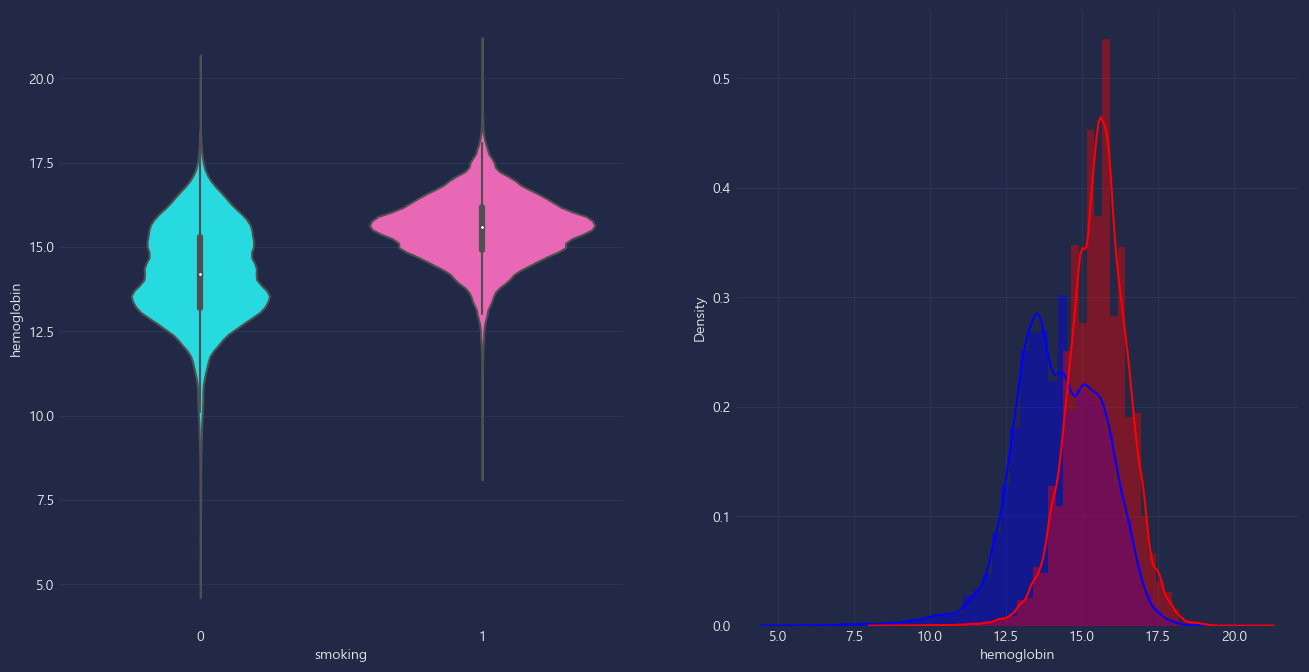

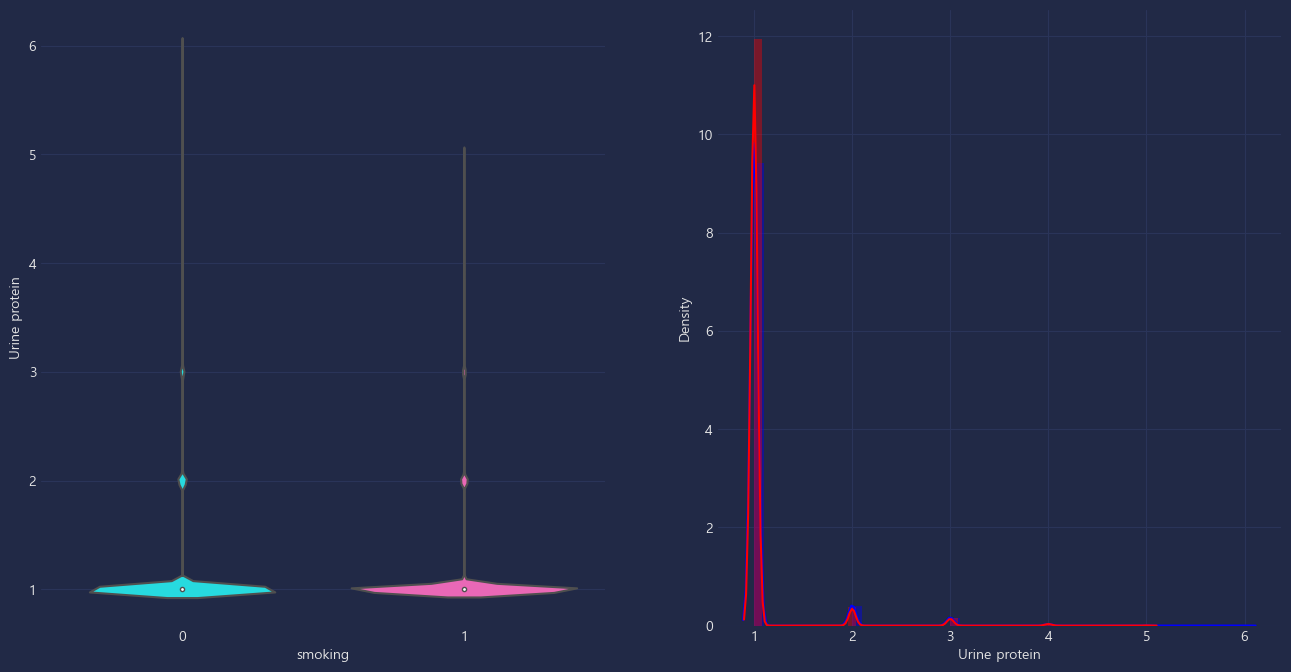

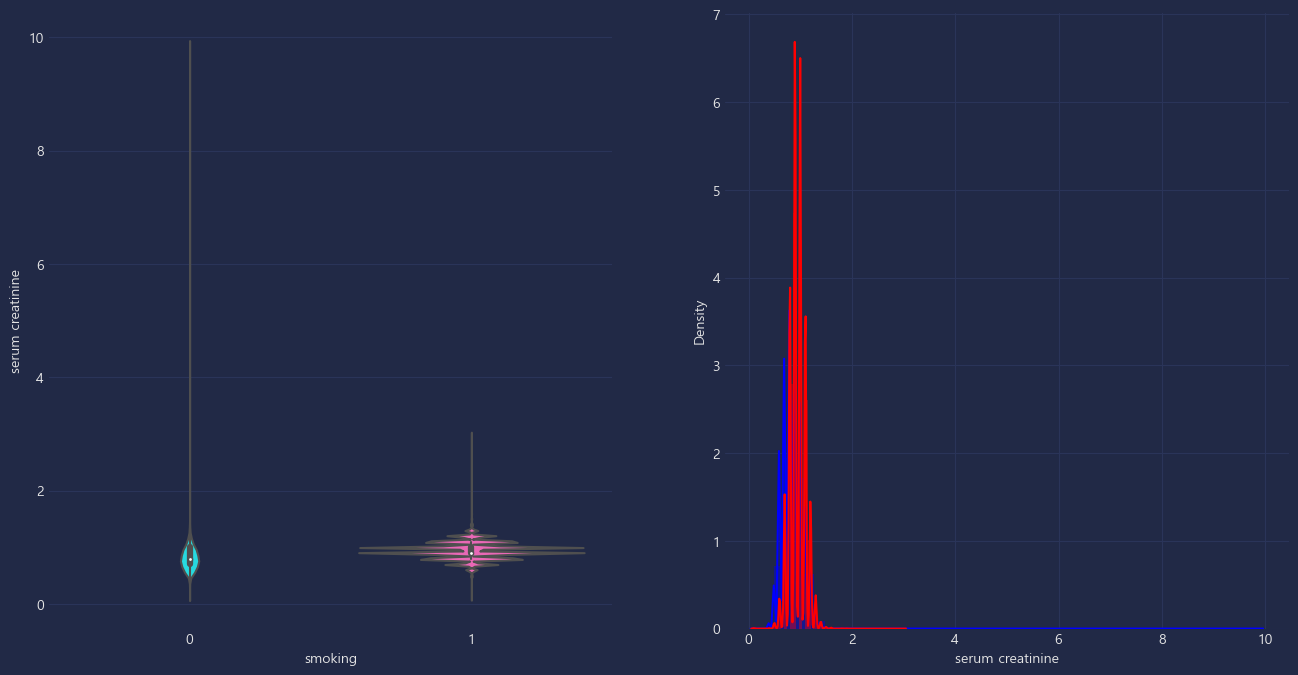

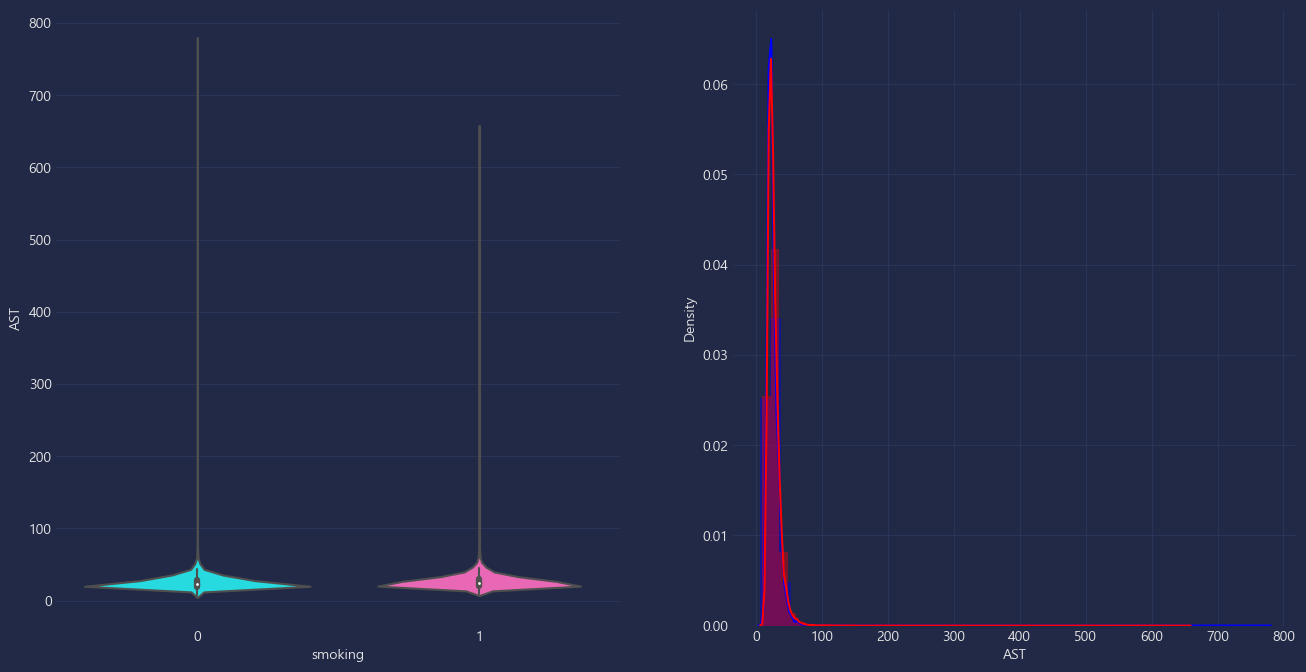

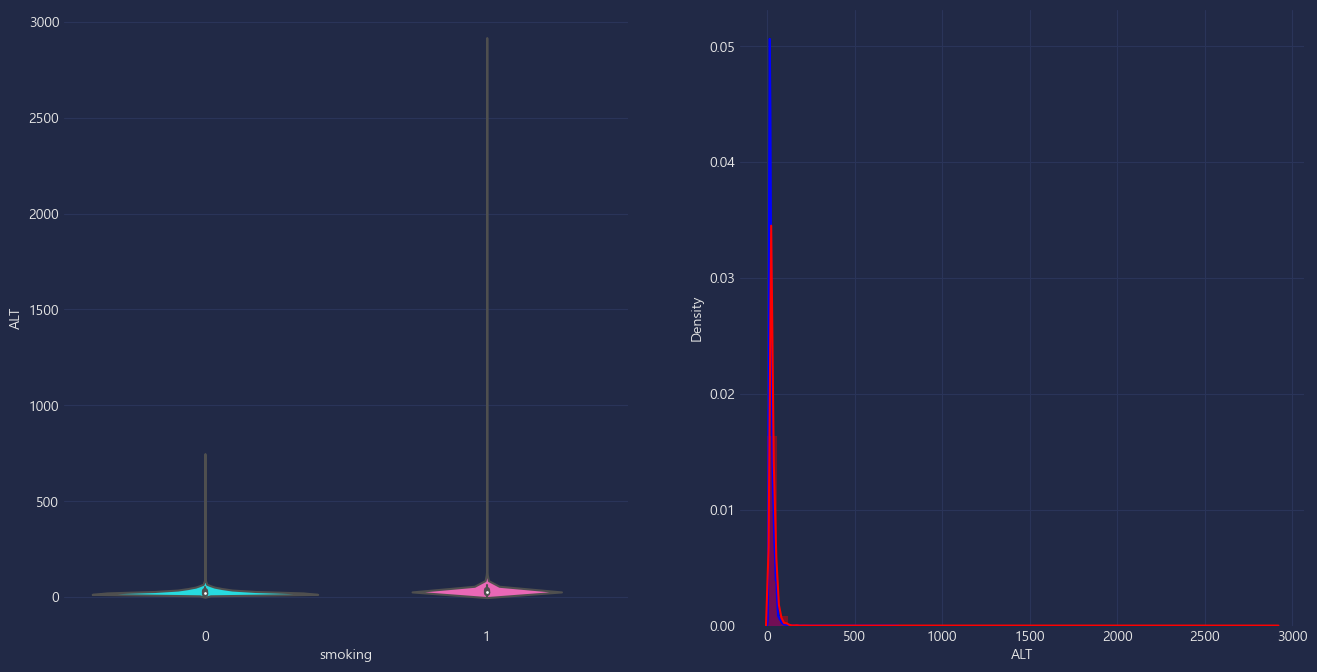

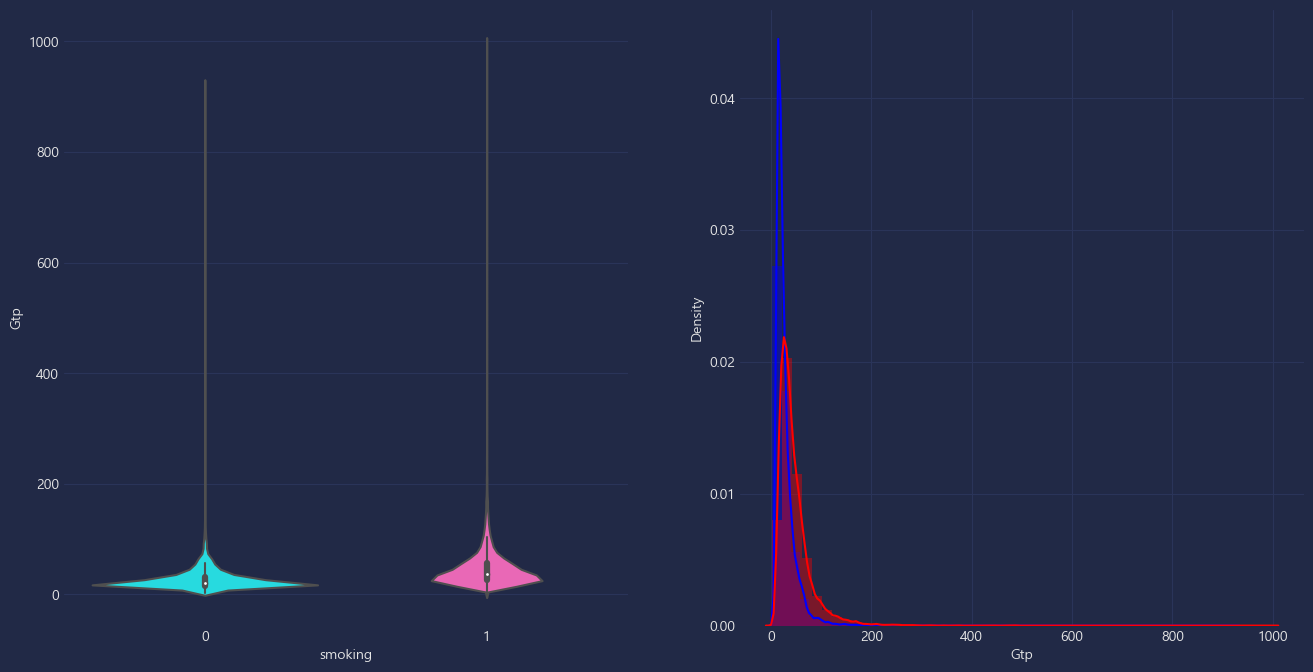

In [367]:
columns = ['age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp']

show_hist_by_target(train, columns)

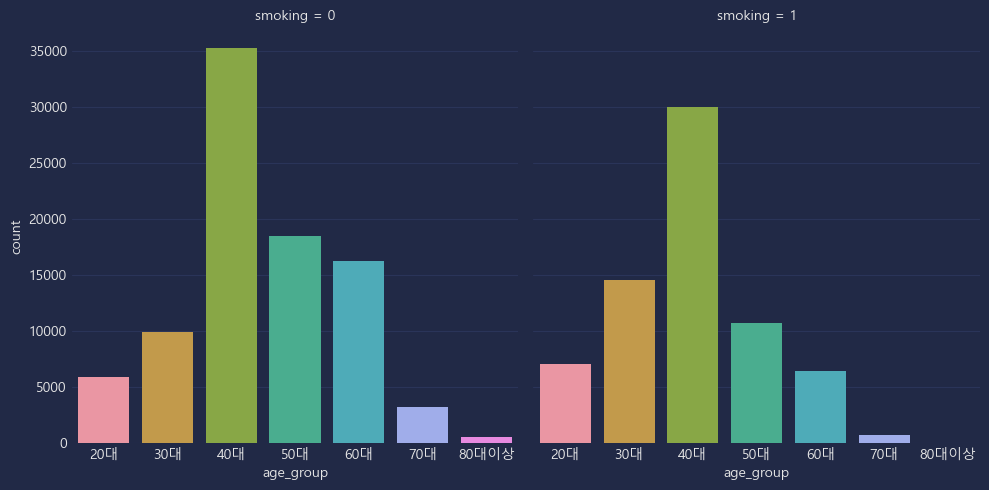

In [368]:
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.catplot(x="age_group",col="smoking", data=train, kind="count")

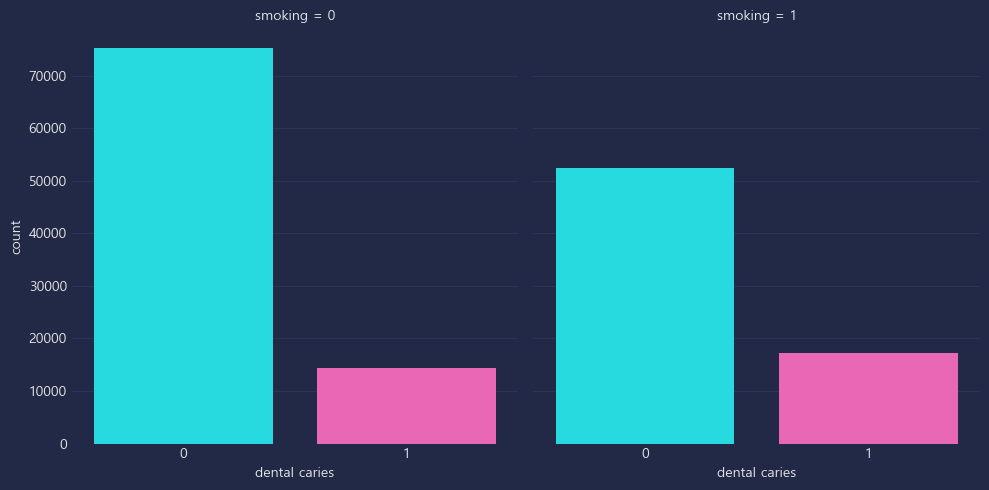

In [369]:
sns.catplot(x="dental caries",col="smoking", data=train, kind="count")

In [370]:
cond_1 = (train['smoking'] == 1)
cond_0 = (train['smoking'] == 0)
cond_n = (train['dental caries'] == '0')
cond_y = (train['dental caries'] == '1')

print(train['dental caries'].value_counts()/train.shape[0])
print(train[cond_1]['dental caries'].value_counts()/train[cond_1].shape[0])
print(train[cond_0]['dental caries'].value_counts()/train[cond_0].shape[0])

dental caries
0    0.802004
1    0.197996
Name: count, dtype: float64
dental caries
0    0.753808
1    0.246192
Name: count, dtype: float64
dental caries
0    0.83947
1    0.16053
Name: count, dtype: float64


In [63]:
train

,id,age,age_group,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,50대,165,60,81.0,0.5,0.6,1,1,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,70대,165,65,89.0,0.6,0.7,2,2,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,20대,170,75,81.0,0.4,0.5,1,1,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,30대,180,95,105.0,1.5,1.2,1,1,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,30대,165,60,80.5,1.5,1.0,1,1,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,40대,155,45,69.0,1.5,2.0,1,1,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,50대,155,75,82.0,1.0,1.0,1,1,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,40대,160,50,66.0,1.5,1.0,1,1,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,50대,165,75,92.0,1.2,1.0,1,1,...,55,80,14.4,1,1.1,22,17,37,0,1


In [64]:
test

,id,age,age_group,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,40대,165,70,84.0,1.2,1.2,1,1,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,80대이상,160,60,93.0,1.0,1.0,2,2,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,60대,170,70,86.5,0.6,0.7,1,1,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,40대,160,50,67.0,0.3,0.4,1,1,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,40대,170,75,89.4,1.0,0.9,1,1,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,40대,165,60,78.0,0.8,0.9,1,1,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,40대,170,85,95.0,1.2,1.2,1,1,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,30대,170,85,89.0,1.2,1.2,1,1,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,40대,160,60,67.0,0.7,0.8,1,1,...,81,55,103,13.9,1,0.6,42,36,32,0


In [62]:
pd.concat[

,id,age,age_group,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,50대,165,60,81.0,0.5,0.6,1,1,...,40,75,16.5,1,1.0,22,25,27,0,1.0
1,1,70,70대,165,65,89.0,0.6,0.7,2,2,...,57,126,16.2,1,1.1,27,23,37,1,0.0
2,2,20,20대,170,75,81.0,0.4,0.5,1,1,...,45,93,17.4,1,0.8,27,31,53,0,1.0
3,3,35,30대,180,95,105.0,1.5,1.2,1,1,...,38,102,15.9,1,1.0,20,27,30,1,0.0
4,4,30,30대,165,60,80.5,1.5,1.0,1,1,...,44,93,15.4,1,0.8,19,13,17,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,40대,165,60,78.0,0.8,0.9,1,1,...,59,149,16.4,1,1.1,24,31,28,0,NaN
106167,265423,40,40대,170,85,95.0,1.2,1.2,1,1,...,44,100,16.0,2,1.0,25,31,38,0,NaN
106168,265424,35,30대,170,85,89.0,1.2,1.2,1,1,...,53,142,15.9,1,0.8,33,32,24,1,NaN
106169,265425,40,40대,160,60,67.0,0.7,0.8,1,1,...,55,103,13.9,1,0.6,42,36,32,0,NaN


In [378]:
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import squarify


x = 0
y = 0
width = 100
height = 100

age_names = smoke['age_group'].value_counts().index
values = smoke['age_group'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in age_names],
    mode='text',
)

layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

### 데이터 전처리

In [379]:
train.shape, test.shape

((159256, 25), (106171, 24))

In [380]:
smoke.shape

(265427, 25)

In [381]:
smoke['smoking'].value_counts(dropna=False)

smoking
NaN    106171
0.0     89603
1.0     69653
Name: count, dtype: int64

In [382]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265427 entries, 0 to 106170
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   265427 non-null  int64   
 1   age                  265427 non-null  int64   
 2   age_group            265427 non-null  category
 3   height(cm)           265427 non-null  int64   
 4   weight(kg)           265427 non-null  int64   
 5   waist(cm)            265427 non-null  float64 
 6   eyesight(left)       265427 non-null  float64 
 7   eyesight(right)      265427 non-null  float64 
 8   hearing(left)        265427 non-null  int64   
 9   hearing(right)       265427 non-null  int64   
 10  systolic             265427 non-null  int64   
 11  relaxation           265427 non-null  int64   
 12  fasting blood sugar  265427 non-null  int64   
 13  Cholesterol          265427 non-null  int64   
 14  triglyceride         265427 non-null  int64   
 15  HDL  

In [383]:
smoke['age_group'] = pd.factorize(smoke['age_group'])[0]

In [384]:
smoke['dental caries'] = pd.factorize(smoke['dental caries'])[0]

In [385]:
smoke.isnull().sum()

id                          0
age                         0
age_group                   0
height(cm)                  0
weight(kg)                  0
waist(cm)                   0
eyesight(left)              0
eyesight(right)             0
hearing(left)               0
hearing(right)              0
systolic                    0
relaxation                  0
fasting blood sugar         0
Cholesterol                 0
triglyceride                0
HDL                         0
LDL                         0
hemoglobin                  0
Urine protein               0
serum creatinine            0
AST                         0
ALT                         0
Gtp                         0
dental caries               0
smoking                106171
dtype: int64

In [386]:
smoke = smoke.fillna(-999)

In [387]:
smoke.isnull().sum()

id                     0
age                    0
age_group              0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [388]:
smoke = smoke.drop(smoke[['dental caries', 'Urine protein', 'hearing(left)', 'hearing(right)']], axis=1)

In [389]:
train = smoke[smoke['smoking'] != -999]
test = smoke[smoke['smoking']== -999]
train.shape, test.shape

((159256, 21), (106171, 21))

In [390]:
test = test.drop('smoking', axis=1)

In [391]:
test.shape

(106171, 20)

In [392]:
test.dtypes

id                       int64
age                      int64
age_group                int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dtype: object

### 상관분석

In [393]:
in_corr_columns = ['systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'smoking']

corr = train[in_corr_columns].corr()

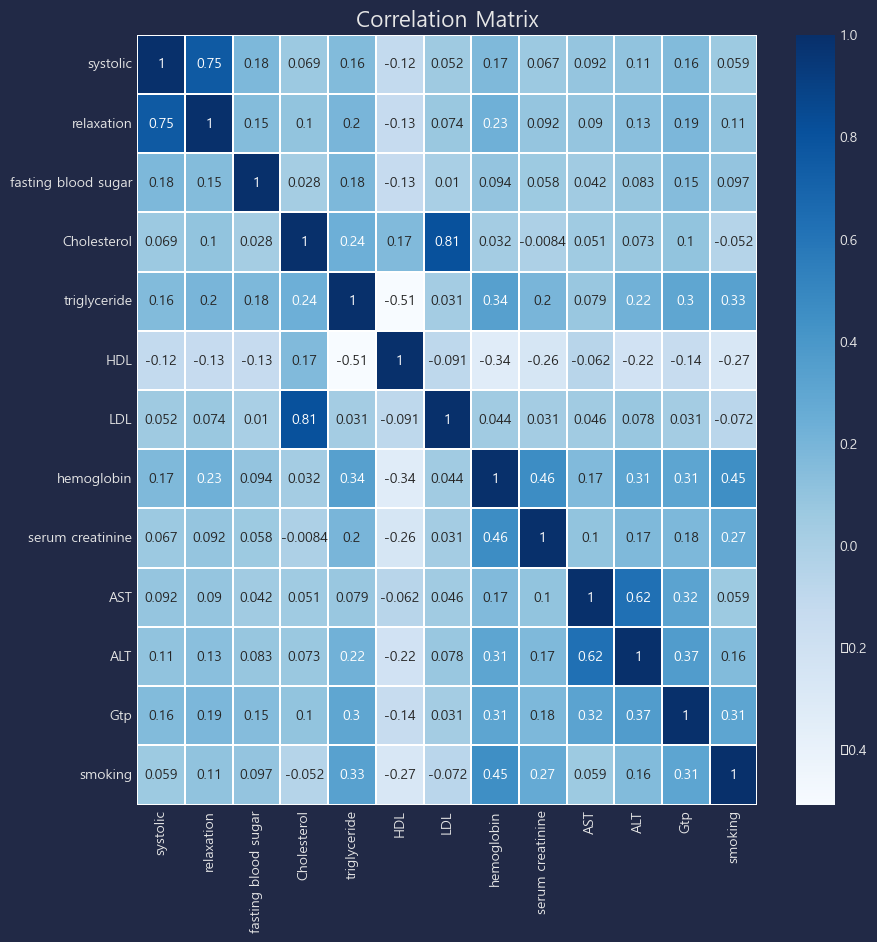

In [290]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap = 'Blues', linewidth = 0.1)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [291]:
out_corr_columns = ['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'smoking']

corr = train[out_corr_columns].corr()

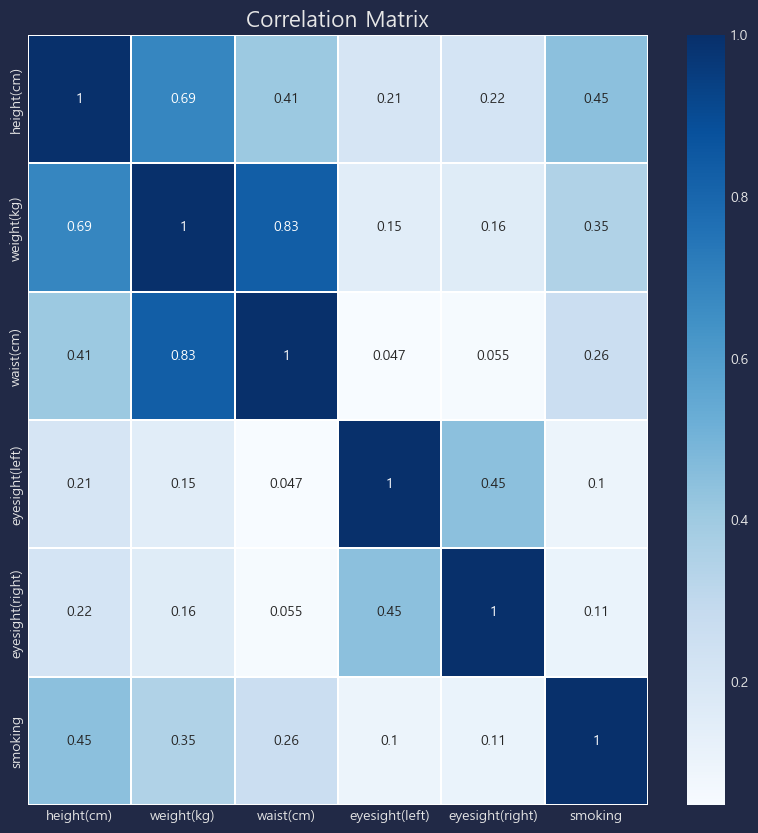

In [292]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap = 'Blues', linewidth = 0.1)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

* 단백뇨, 충치, 청력 변수 삭제

### 파생변수 생성

In [14]:
smoke = pd.concat([train, test])
print(smoke.shape)

(265427, 25)


In [15]:
smoke['BMI'] = smoke['weight(kg)']/((smoke['height(cm)']/100)**2)
smoke['mean_eyesight'] = (smoke['eyesight(left)']+smoke['eyesight(right)'])/2
smoke['MHI'] = smoke['fasting blood sugar'] + smoke['Cholesterol'] + smoke['HDL']
smoke['CHI'] = smoke['systolic'] + smoke['Cholesterol'] + smoke['HDL']
smoke['LHI'] = smoke['AST'] + smoke['Gtp']
smoke['KHI'] = smoke['serum creatinine'] + smoke['triglyceride']
smoke['WtHR'] = smoke['waist(cm)']/smoke['height(cm)']
smoke['ISB'] = smoke['relaxation'] * smoke['systolic']

In [16]:
train = smoke[~smoke['smoking'].isnull()]
test = smoke[smoke['smoking'].isnull()]

test = test.drop('smoking', axis=1)

In [17]:
train.shape, test.shape

((159256, 33), (106171, 32))

### 분류 모델 선정

In [18]:
from sklearn.model_selection import train_test_split

ftr_smoke = train.drop(['id', 'smoking'], axis=1)
target_smoke = train['smoking']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_smoke, target_smoke, test_size=0.3, random_state=7)
train_x.shape, valid_x.shape

((111479, 31), (47777, 31))

In [19]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

#### LGBM

In [299]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc')

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000, n_jobs=-1,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

In [300]:
preds_clf_train = clf.predict(train_x)
preds_clf_test = clf.predict(valid_x)

In [301]:
model_eval(preds_clf_train,train_y)

Model Accuracy is:  0.8
[[48711  7762]
 [14005 41001]]
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82     56473
         1.0       0.84      0.75      0.79     55006

    accuracy                           0.80    111479
   macro avg       0.81      0.80      0.80    111479
weighted avg       0.81      0.80      0.80    111479



In [302]:
model_eval(preds_clf_test,valid_y)

Model Accuracy is:  0.78
[[20357  4001]
 [ 6530 16889]]
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.79     24358
         1.0       0.81      0.72      0.76     23419

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.78      0.78      0.78     47777



#### Lr

In [303]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x,train_y)

LogisticRegression()

In [304]:
preds_lr_train = lr.predict(train_x)
preds_lr_test = lr.predict(valid_x)

In [305]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


model_eval(preds_lr_train,train_y)

Model Accuracy is:  0.72
[[48452 16469]
 [14264 32294]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76     64921
         1.0       0.66      0.69      0.68     46558

    accuracy                           0.72    111479
   macro avg       0.72      0.72      0.72    111479
weighted avg       0.73      0.72      0.73    111479



In [306]:
model_eval(preds_lr_test,valid_y)

Model Accuracy is:  0.73
[[20840  6870]
 [ 6047 14020]]
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76     27710
         1.0       0.67      0.70      0.68     20067

    accuracy                           0.73     47777
   macro avg       0.72      0.73      0.72     47777
weighted avg       0.73      0.73      0.73     47777



#### RF

In [307]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=12)
rf.fit(train_x,train_y)

RandomForestClassifier(random_state=12)

In [308]:
preds_rf_train = rf.predict(train_x)
preds_rf_test = rf.predict(valid_x)

In [309]:
model_eval(preds_rf_train,train_y)

Model Accuracy is:  1.0
[[62715     0]
 [    1 48763]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     62715
         1.0       1.00      1.00      1.00     48764

    accuracy                           1.00    111479
   macro avg       1.00      1.00      1.00    111479
weighted avg       1.00      1.00      1.00    111479



In [310]:
model_eval(preds_rf_test,valid_y)

Model Accuracy is:  0.77
[[20264  4297]
 [ 6623 16593]]
              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79     24561
         1.0       0.79      0.71      0.75     23216

    accuracy                           0.77     47777
   macro avg       0.77      0.77      0.77     47777
weighted avg       0.77      0.77      0.77     47777



#### XGBoost

In [311]:
import xgboost as xgb

In [312]:
xgclf = xgb.XGBRFClassifier()
xgclf.fit(train_x,train_y)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [313]:
preds_xgb_train = xgclf.predict(train_x)
preds_xgb_test = xgclf.predict(valid_x)

In [314]:
model_eval(preds_xgb_train,train_y)

Model Accuracy is:  0.76
[[44882  8699]
 [17834 40064]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     53581
           1       0.82      0.69      0.75     57898

    accuracy                           0.76    111479
   macro avg       0.77      0.76      0.76    111479
weighted avg       0.77      0.76      0.76    111479



In [315]:
model_eval(preds_xgb_test,valid_y)

Model Accuracy is:  0.76
[[19168  3858]
 [ 7719 17032]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77     23026
           1       0.82      0.69      0.75     24751

    accuracy                           0.76     47777
   macro avg       0.76      0.76      0.76     47777
weighted avg       0.77      0.76      0.76     47777



#### AdaBoost

In [316]:
from sklearn.ensemble import AdaBoostClassifier

In [317]:
ada = AdaBoostClassifier()
ada.fit(train_x,train_y)

AdaBoostClassifier()

In [318]:
preds_ada_train = ada.predict(train_x)
preds_ada_test = ada.predict(valid_x)

In [319]:
model_eval(preds_ada_train,train_y)

Model Accuracy is:  0.77
[[47107 10293]
 [15609 38470]]
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78     57400
         1.0       0.79      0.71      0.75     54079

    accuracy                           0.77    111479
   macro avg       0.77      0.77      0.77    111479
weighted avg       0.77      0.77      0.77    111479



In [320]:
model_eval(preds_ada_test,valid_y)

Model Accuracy is:  0.77
[[20236  4447]
 [ 6651 16443]]
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78     24683
         1.0       0.79      0.71      0.75     23094

    accuracy                           0.77     47777
   macro avg       0.77      0.77      0.77     47777
weighted avg       0.77      0.77      0.77     47777



#### Random Search

In [321]:
from sklearn.model_selection import RandomizedSearchCV

In [322]:
param_dist_clf = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'learning_rate': [0.01, 0.1, 1, 10, 100],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4, 5],  
    'subsample': [0.8, 0.85, 0.9, 0.95, 1.0]  
}

In [323]:
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist_clf, n_iter=10, 
                                   scoring='roc_auc', cv=3, n_jobs=-1, random_state=123)

In [324]:
random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(learning_rate=0.02, max_depth=12,
                                            n_estimators=1000, n_jobs=-1,
                                            num_leaves=32, silent=-1,
                                            subsample=0.8, verbose=-1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [50, 100, 150, 200, 300,
                                                         400, 500, 600, 700,
                                                         800, 900, 1000],
                                        'subsample': [0.8, 0.85, 0.9, 0.95,
                                                      1.0]},
                   random_state=123, scoring='roc_auc')

In [325]:
print(random_search.best_params_)

{'subsample': 0.95, 'n_estimators': 500, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.1}


In [326]:
n_clf = LGBMClassifier(
        n_estimators=500,
        learning_rate=0.1,
        num_leaves=32,
        subsample=0.95,
        max_depth=4,
        silent=-1,
        verbose=-1,
    min_child_weight = 2
        )

n_clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc')

LGBMClassifier(max_depth=4, min_child_weight=2, n_estimators=500, num_leaves=32,
               silent=-1, subsample=0.95, verbose=-1)

In [327]:
preds_clf_train = n_clf.predict(train_x)
preds_clf_test = n_clf.predict(valid_x)

In [328]:
model_eval(preds_clf_train,train_y)

Model Accuracy is:  0.8
[[48556  7804]
 [14160 40959]]
              precision    recall  f1-score   support

         0.0       0.77      0.86      0.82     56360
         1.0       0.84      0.74      0.79     55119

    accuracy                           0.80    111479
   macro avg       0.81      0.80      0.80    111479
weighted avg       0.81      0.80      0.80    111479



In [329]:
model_eval(preds_clf_test,valid_y)

Model Accuracy is:  0.78
[[20365  3932]
 [ 6522 16958]]
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80     24297
         1.0       0.81      0.72      0.76     23480

    accuracy                           0.78     47777
   macro avg       0.78      0.78      0.78     47777
weighted avg       0.78      0.78      0.78     47777



#### Baysian search

In [21]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

In [331]:
bayesian_params = {
    'max_depth':(6, 16), #트리 최대 깊이
    'num_leaves':(24,64), #트리 하나에 최대 잎 개수
    'min_child_samples': (10, 200), #하나의 잎에 최소 데이터 개수 (오버피팅 대응)
    'min_child_weight': (1, 50), #하나의 잎에 최소 sum hessian
    'subsample': (0.5, 1), #
    'colsample_bytree': (0.5, 1), #피처의 50% 를 트레이닝 전에 선택
    'max_bin': (10, 500), #bins 의 최대 개수
    'reg_lambda': (0.001, 10), #L2 regularization
    'reg_alpha': (0.01, 50) #L1 regularization 
}

In [332]:
def lgb_roc_eval(max_depth, num_leaves, min_child_samples, min_child_weight, subsample, colsample_bytree, max_bin, reg_lambda, reg_alpha):
  params = {
      "n_estimators" : 500, "learning_rate": 0.02,
      'max_depth': int(round(max_depth)),
      'num_leaves': int(round(num_leaves)),
      'min_child_samples': int(round(min_child_samples)),
      'min_child_weight': int(round(min_child_weight)),
      'subsample': max(min(subsample, 1), 0), # 0 과 1 사이
      'colsample_bytree': max(min(colsample_bytree, 1), 0),
      'max_bin':  max(int(round(max_bin)),10),
      'reg_lambda': max(reg_lambda,0),
      'reg_alpha': max(reg_alpha, 0)

  }
  lgb_model = LGBMClassifier(**params)
  lgb_model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc')
  valid_proba = lgb_model.predict_proba(valid_x)[:, 1]
  roc_auc = roc_auc_score(valid_y, valid_proba)

  return roc_auc

In [333]:
lgbBO = BayesianOptimization(f= lgb_roc_eval, pbounds=bayesian_params, random_state = 0)
lgbBO.maximize(init_points = 5, n_iter = 25)

|   iter    |  target   | colsam... |  max_bin  | max_depth | min_ch... | min_ch... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 48763, number of negative: 62716
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4471
[LightGBM] [Info] Number of data points in the train set: 111479, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437419 -> initscore=-0.251645
[LightGBM] [Info] Start training from score -0.251645
| 1         | 0.8648    | 0.7744    | 360.4     | 12.03     | 113.5     | 21.

In [334]:
lgbBO.res

[{'target': 0.8648036532805428,
  'params': {'colsample_bytree': 0.7744067519636624,
   'max_bin': 360.44278952248555,
   'max_depth': 12.027633760716439,
   'min_child_samples': 113.52780476941041,
   'min_child_weight': 21.75908516760633,
   'num_leaves': 49.835764522666246,
   'reg_alpha': 21.884984691022,
   'reg_lambda': 8.917838234820016,
   'subsample': 0.9818313802505146}},
 {'target': 0.86467427646899,
  'params': {'colsample_bytree': 0.6917207594128889,
   'max_bin': 397.94526866050563,
   'max_depth': 11.288949197529044,
   'min_child_samples': 117.92846660784714,
   'min_child_weight': 46.35423527634039,
   'num_leaves': 26.841442327915477,
   'reg_alpha': 4.36559369208002,
   'reg_lambda': 0.20316375600581688,
   'subsample': 0.916309922773969}},
 {'target': 0.8658474131305313,
  'params': {'colsample_bytree': 0.8890783754749252,
   'max_bin': 436.30595264094137,
   'max_depth': 15.78618342232764,
   'min_child_samples': 161.8401272011775,
   'min_child_weight': 23.6124887

In [335]:
# dictionary에 있는 target값을 모두 추출
target_list = []
for result in lgbBO.res:
    target = result['target']
    target_list.append(target)
print(target_list)
# 가장 큰 target 값을 가지는 순번(index)를 추출
print('maximum target index:', np.argmax(np.array(target_list)))

# 가장 큰 target값을 가지는 index값을 기준으로 res에서 해당 parameter 추출. 
max_dict = lgbBO.res[np.argmax(np.array(target_list))]
print(max_dict)

[0.8648036532805428, 0.86467427646899, 0.8658474131305313, 0.8639285673781463, 0.863951970823835, 0.8660037666639611, 0.8641394939368517, 0.8657942501873389, 0.8654565782581402, 0.8612094003406952, 0.8642735567787623, 0.8656386729112175, 0.8646862497038516, 0.8639143419288461, 0.864486673237673, 0.8660428270059134, 0.8651222588347028, 0.8662760175500384, 0.8641930628127652, 0.8658362499807049, 0.8640395276630952, 0.8631527783165981, 0.8648223938411603, 0.866196860669451, 0.8641852503882934, 0.864778058154242, 0.8657894608933943, 0.8664463508366479, 0.8662518787963946, 0.8655018344153073]
maximum target index: 27
{'target': 0.8664463508366479, 'params': {'colsample_bytree': 0.5408221519792711, 'max_bin': 426.5118516350021, 'max_depth': 14.89414673122291, 'min_child_samples': 158.2074368723801, 'min_child_weight': 44.74589985320191, 'num_leaves': 61.59259887591635, 'reg_alpha': 0.5235617296432662, 'reg_lambda': 7.7044984938535075, 'subsample': 0.585796564596762}}


In [22]:
b_clf = LGBMClassifier(
        colsample_bytree = 0.5408221519792711, 
    max_bin = 427, max_depth= 15, min_child_samples= 158, 
    min_child_weight= 44.74589985320191, num_leaves= 61, reg_alpha= 0.5235617296432662,
    reg_lambda= 7.7044984938535075, subsample= 0.585796564596762
        )

b_clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
eval_metric= 'auc')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 48763, number of negative: 62716
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4731
[LightGBM] [Info] Number of data points in the train set: 111479, number of used features: 31
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437419 -> initscore=-0.251645
[LightGBM] [Info] Start training from score -0.251645


LGBMClassifier(colsample_bytree=0.5408221519792711, max_bin=427, max_depth=15,
               min_child_samples=158, min_child_weight=44.74589985320191,
               num_leaves=61, reg_alpha=0.5235617296432662,
               reg_lambda=7.7044984938535075, subsample=0.585796564596762)

In [23]:
preds_clf_train = b_clf.predict(train_x)
preds_clf_test = b_clf.predict(valid_x)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_eval(preds_clf_train,train_y)

Model Accuracy is:  0.8
[[48782  8067]
 [13934 40696]]
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82     56849
         1.0       0.83      0.74      0.79     54630

    accuracy                           0.80    111479
   macro avg       0.81      0.80      0.80    111479
weighted avg       0.81      0.80      0.80    111479



In [28]:
model_eval(preds_clf_test,valid_y)

Model Accuracy is:  0.78
[[20540  4016]
 [ 6347 16874]]
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80     24556
         1.0       0.81      0.73      0.77     23221

    accuracy                           0.78     47777
   macro avg       0.79      0.78      0.78     47777
weighted avg       0.79      0.78      0.78     47777



#### feature important

Feature ranking:
1. feature 21 (409.000000)
2. feature 16 (393.000000)
3. feature 15 (346.000000)
4. feature 13 (342.000000)
5. feature 0 (329.000000)
6. feature 28 (300.000000)
7. feature 20 (280.000000)
8. feature 18 (253.000000)
9. feature 23 (238.000000)
10. feature 19 (237.000000)
11. feature 10 (229.000000)
12. feature 12 (228.000000)
13. feature 26 (227.000000)
14. feature 11 (220.000000)
15. feature 2 (215.000000)
16. feature 14 (202.000000)
17. feature 29 (194.000000)
18. feature 30 (191.000000)
19. feature 27 (185.000000)
20. feature 9 (184.000000)
21. feature 4 (158.000000)
22. feature 25 (118.000000)
23. feature 3 (112.000000)
24. feature 24 (107.000000)
25. feature 6 (78.000000)
26. feature 22 (77.000000)
27. feature 1 (69.000000)
28. feature 5 (62.000000)
29. feature 17 (9.000000)
30. feature 8 (6.000000)
31. feature 7 (2.000000)


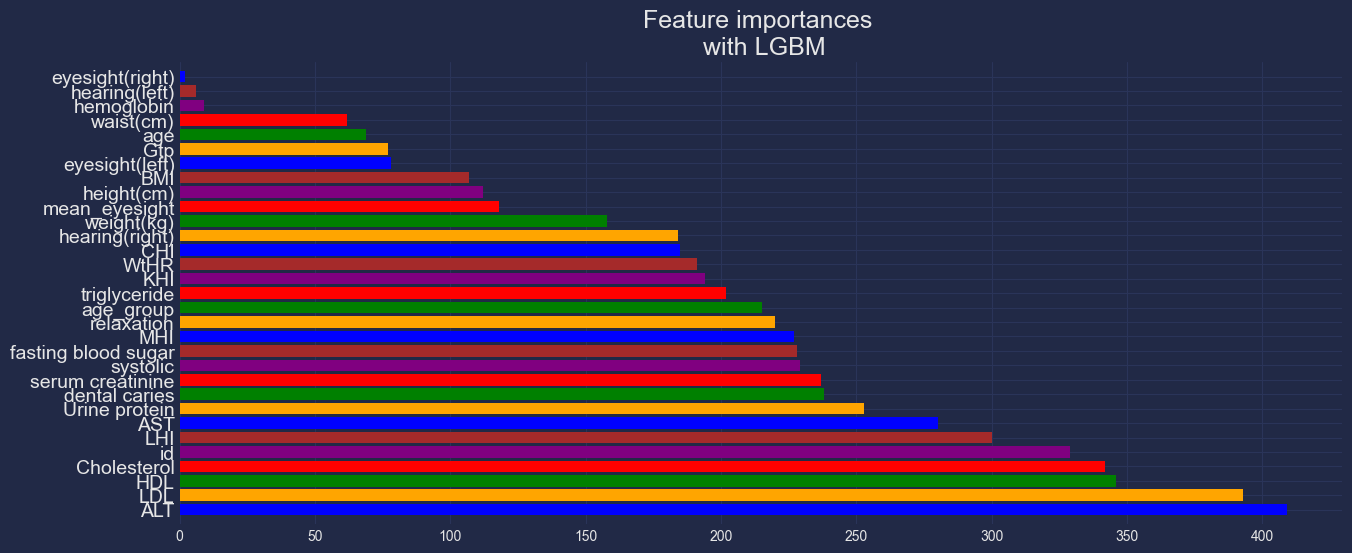

In [32]:
from lightgbm import plot_importance
importances = b_clf.feature_importances_
feature_names = smoke.drop('smoking', axis=1).columns
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(15,6))
    plt.title("Feature importances \n with LGBM", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color=['blue', 'orange', 'green', 'red', 'purple', 'brown'],  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])   
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [341]:
preds = n_clf.predict_proba(test.drop(['id'], axis=1))[:, 1 ]

In [342]:
test['smoking'] = preds
test['smoking'].head(10)

0    0.624801
1    0.101330
2    0.345572
3    0.014936
4    0.507980
5    0.865883
6    0.515671
7    0.039275
8    0.064288
9    0.034956
Name: smoking, dtype: float64

In [343]:
test[['id', 'smoking']].to_csv('baseline_02.csv', index=False)

#### Voting

In [33]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('xgb', xgclf), ('lgbm', b_clf), ('ada', ada)],
    voting='soft'
)

voting_clf.fit(train_x, train_y)

NameError: name 'xgclf' is not defined

In [345]:
for clf in (xgclf, n_clf, ada, voting_clf):
    clf.fit(train_x, train_y)
    predict = clf.predict(valid_x)
    print(clf.__class__.__name__, accuracy_score(valid_y, predict))

XGBRFClassifier 0.7576867530401658
LGBMClassifier 0.7811917868430416
AdaBoostClassifier 0.7677124976453105
VotingClassifier 0.775435879188731


### 오분류표 및 최종 모델 평가 지표

In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(b_clf, train_x, train_y, cv=3)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 32509, number of negative: 41810
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4554
[LightGBM] [Info] Number of data points in the train set: 74319, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437425 -> initscore=-0.251619
[LightGBM] [Info] Start training from score -0.251619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 32508, number of negative: 41811
[LightGBM] [Info] Auto-choosing col-wise multi-thr

In [36]:
b_clf.fit(train_x, train_y)
print ("LGBM Classifier accuracy is %2.2f" % accuracy_score(train_y, y_train_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 48763, number of negative: 62716
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4731
[LightGBM] [Info] Number of data points in the train set: 111479, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437419 -> initscore=-0.251645
[LightGBM] [Info] Start training from score -0.251645
LGBM Classifier accuracy is 0.78


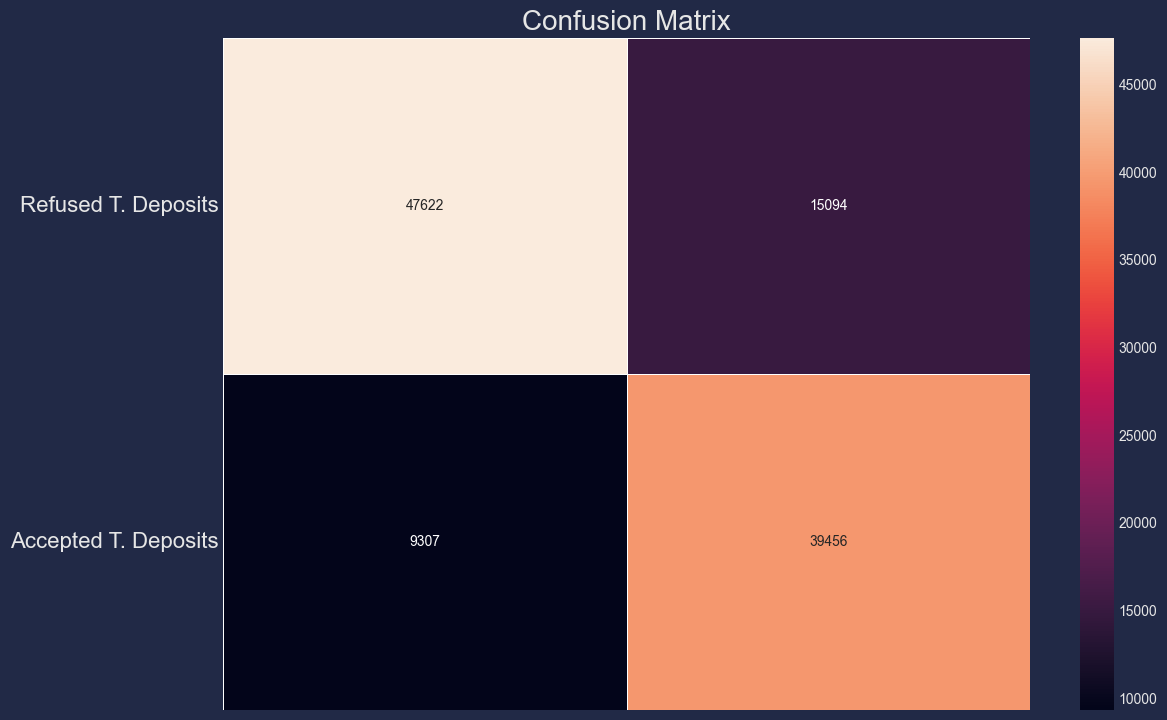

In [37]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(train_y, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
f1 = 2*(recall_score(train_y, y_train_pred)*precision_score(train_y, y_train_pred)/(recall_score(train_y, y_train_pred)+precision_score(train_y, y_train_pred)))
print('Precision Score: ', precision_score(train_y, y_train_pred))
print('Recall Score: ', recall_score(train_y, y_train_pred))
print('Accuracy Score: ', accuracy_score(train_y, y_train_pred))
print('F1-Score: ', f1)

Precision Score:  0.7232997250229147
Recall Score:  0.8091380760002461
Accuracy Score:  0.781115725831771
F1-Score:  0.7638148151733082
